<a href="https://colab.research.google.com/github/SoheliPaul/Machine-Learning/blob/main/DiabetesPredictionSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/drive/MyDrive/ML/TestingDiabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

Information about this dataset:

Pregnancies: Number of times pregnant.

Glucose: Plasma glucose concentration.

BloodPressure: Diastolic blood pressure (mm Hg).

SkinThickness: Triceps skin fold thickness (mm).

Insulin: 2-Hour serum insulin (mu U/ml).

BMI: Body mass index (weight in kg/(height in m)^2).

DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history).

Age: Age in years.

Outcome: Class variable (0 or 1) where 0 denotes "no diabetes" and 1 denotes "diabetes".

The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

What is diabetes ?

Acccording to NIH, "Diabetes is a disease that occurs when your blood glucose, also called blood sugar, is too high. Blood glucose is your main source of energy and comes from the food you eat. Insulin, a hormone made by the pancreas, helps glucose from food get into your cells to be used for energy. Sometimes your body doesn’t make enough—or any—insulin or doesn’t use insulin well. Glucose then stays in your blood and doesn’t reach your cells.

Over time, having too much glucose in your blood can cause health problems. Although diabetes has no cure, you can take steps to manage your diabetes and stay healthy.

Sometimes people call diabetes “a touch of sugar” or “borderline diabetes.” These terms suggest that someone doesn’t really have diabetes or has a less serious case, but every case of diabetes is serious.

What are the different types of diabetes? The most common types of diabetes are type 1, type 2, and gestational diabetes.

Type 1 diabetes If you have type 1 diabetes, your body does not make insulin. Your immune system attacks and destroys the cells in your pancreas that make insulin. Type 1 diabetes is usually diagnosed in children and young adults, although it can appear at any age. People with type 1 diabetes need to take insulin every day to stay alive.

Type 2 diabetes If you have type 2 diabetes, your body does not make or use insulin well. You can develop type 2 diabetes at any age, even during childhood. However, this type of diabetes occurs most often in middle-aged and older people. Type 2 is the most common type of diabetes.

Gestational diabetes Gestational diabetes develops in some women when they are pregnant. Most of the time, this type of diabetes goes away after the baby is born. However, if you’ve had gestational diabetes, you have a greater chance of developing type 2 diabetes later in life. Sometimes diabetes diagnosed during pregnancy is actually type 2 diabetes.

Other types of diabetes Less common types include monogenic diabetes, which is an inherited form of diabetes, and cystic fibrosis-related diabetes ."



In [3]:
df.shape

(768, 9)

The dataset has 768 rows and 9 columns.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

The Question creeping out of this summary

Can minimum value of below listed columns be zero (0)?

On these columns, a value of zero does not make sense and thus indicates missing value.

Following columns or variables have an invalid zero value:

Glucose
BloodPressure
SkinThickness
Insulin
BMI

It is better to replace zeros with nan since after that counting them would be easier and zeros need to be replaced with suitable values¶

In [12]:
df = df.copy(deep = True)
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(df.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [11]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [23]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())#normal distribution
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())#normal distribution
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())#skewed distribution
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())#skewed distribution
df['BMI']=df['BMI'].replace(0,df['BMI'].median())#skewed distribution

In [24]:
print(df[df['BloodPressure']==0].shape[0])
print(df[df['Glucose']==0].shape[0])
print(df[df['SkinThickness']==0].shape[0])
print(df[df['Insulin']==0].shape[0])
print(df[df['BMI']==0].shape[0])

0
0
0
0
0


In [13]:
import plotly.graph_objs as go
import plotly.offline as py
D = df[(df['Outcome'] != 0)]
H = df[(df['Outcome'] == 0)]

#------------COUNT-----------------------
def target_count():
    trace = go.Bar( x = df['Outcome'].value_counts().values.tolist(),
                    y = ['healthy','diabetic' ],
                    orientation = 'h',
                    text=df['Outcome'].value_counts().values.tolist(),
                    textfont=dict(size=15),
                    textposition = 'auto',
                    opacity = 0.8,marker=dict(
                    color=['lightskyblue', 'gold'],
                    line=dict(color='#000000',width=1.5)))

    layout = dict(title =  'Count of Outcome variable')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

#------------PERCENTAGE-------------------
def target_percent():
    trace = go.Pie(labels = ['healthy','diabetic'], values = df['Outcome'].value_counts(),
                   textfont=dict(size=15), opacity = 0.8,
                   marker=dict(colors=['lightskyblue', 'gold'],
                               line=dict(color='#000000', width=1.5)))


    layout = dict(title =  'Distribution of Outcome variable')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)
target_count()
target_percent()

The above graph shows that the data is unbalanced. The number of diabetic is 268 the number of non_diabetic patients is 500.

In [3]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
def plot_distribution(data_select, size_bin) :
    # 2 datasets
    tmp1 = D[data_select]
    tmp2 = H[data_select]
    hist_data = [tmp1, tmp2]

    group_labels = ['diabetic', 'healthy']
    colors = ['#FFD700', '#7EC0EE']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = size_bin, curve_type='kde')

    fig['layout'].update(title = data_select)

    py.iplot(fig, filename = 'Density plot')

In [7]:
plot_distribution('Insulin', 0)

In [14]:
def median_target(var):
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp


GLUCOSE

In [16]:
plot_distribution('Glucose', 0)

In [15]:
median_target('Glucose')

Outcome  Glucose
0        0    107.0
1        1    140.0

107 for a healthy person and 140 for a diabetic person.

In [9]:
plot_distribution('SkinThickness', 10)

BLOOD PRESSURE

In [20]:
plot_distribution('BloodPressure', 5)

In [16]:
median_target('BloodPressure')

Outcome  BloodPressure
0        0           70.0
1        1           74.5

In [27]:
plot_distribution('BMI', 0)

In [17]:
median_target('BMI')

Outcome   BMI
0        0  30.1
1        1  34.3

In [10]:
plot_distribution('Age', 0)
plot_distribution('Pregnancies', 0)
plot_distribution('DiabetesPedigreeFunction', 0)

In [31]:
def plot_feat1_feat2(feat1, feat2) :
    D = df[(df['Outcome'] != 0)]
    H = df[(df['Outcome'] == 0)]
    trace0 = go.Scatter(
        x = D[feat1],
        y = D[feat2],
        name = 'diabetic',
        mode = 'markers',
        marker = dict(color = '#FFD700',
            line = dict(
                width = 1)))

    trace1 = go.Scatter(
        x = H[feat1],
        y = H[feat2],
        name = 'healthy',
        mode = 'markers',
        marker = dict(color = '#7EC0EE',
            line = dict(
                width = 1)))

    layout = dict(title = feat1 +" "+"vs"+" "+ feat2,
                  yaxis = dict(title = feat2,zeroline = False),
                  xaxis = dict(title = feat1, zeroline = False)
                 )

    plots = [trace0, trace1]

    fig = dict(data = plots, layout=layout)
    py.iplot(fig)

In [41]:
def barplot(var_select, sub) :
    tmp1 = df[(df['Outcome'] != 0)]
    tmp2 = df[(df['Outcome'] == 0)]
    tmp3 = pd.DataFrame(pd.crosstab(df[var_select],df['Outcome']), )
    tmp3['% diabetic'] = tmp3[1] / (tmp3[1] + tmp3[0]) * 100

    color=['lightskyblue','gold' ]
    trace1 = go.Bar(
        x=tmp1[var_select].value_counts().keys().tolist(),
        y=tmp1[var_select].value_counts().values.tolist(),
        text=tmp1[var_select].value_counts().values.tolist(),
        textposition = 'auto',
        name='diabetic',opacity = 0.8, marker=dict(
        color='gold',
        line=dict(color='#000000',width=1)))


    trace2 = go.Bar(
        x=tmp2[var_select].value_counts().keys().tolist(),
        y=tmp2[var_select].value_counts().values.tolist(),
        text=tmp2[var_select].value_counts().values.tolist(),
        textposition = 'auto',
        name='healthy', opacity = 0.8, marker=dict(
        color='lightskyblue',
        line=dict(color='#000000',width=1)))

    trace3 =  go.Scatter(
        x=tmp3.index,
        y=tmp3['% diabetic'],
        yaxis = 'y2',
        name='% diabetic', opacity = 0.6, marker=dict(
        color='black',
        line=dict(color='#000000',width=0.5
        )))

    layout = dict(title =  str(var_select)+' '+(sub),
              xaxis=dict(),
              yaxis=dict(title= 'Count'),
              yaxis2=dict(range= [-0, 75],
                          overlaying= 'y',
                          anchor= 'x',
                          side= 'right',
                          zeroline=False,
                          showgrid= False,
                          title= '% diabetic'
                         ))

    fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
    py.iplot(fig)

In [42]:
# Define pie plot to visualize each variable repartition vs target modalities : Survived or Died (train)
def plot_pie(var_select, sub) :
    D = df[(df['Outcome'] != 0)]
    H = df[(df['Outcome'] == 0)]

    col =['Silver', 'mediumturquoise','#CF5C36','lightblue','magenta', '#FF5D73','#F2D7EE','mediumturquoise']

    trace1 = go.Pie(values  = D[var_select].value_counts().values.tolist(),
                    labels  = D[var_select].value_counts().keys().tolist(),
                    textfont=dict(size=15), opacity = 0.8,
                    hole = 0.5,
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [.0,.48]),
                    name    = "Diabetic",
                    marker  = dict(colors = col, line = dict(width = 1.5)))
    trace2 = go.Pie(values  = H[var_select].value_counts().values.tolist(),
                    labels  = H[var_select].value_counts().keys().tolist(),
                    textfont=dict(size=15), opacity = 0.8,
                    hole = 0.5,
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 1.5)),
                    domain  = dict(x = [.52,1]),
                    name    = "Healthy" )

    layout = go.Layout(dict(title = var_select + " distribution by target <br>"+(sub),
                            annotations = [ dict(text = "Diabetic"+" : "+"268",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .22, y = -0.1),
                                            dict(text = "Healthy"+" : "+"500",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .8,y = -.1)]))


    fig  = go.Figure(data = [trace1,trace2],layout = layout)
    py.iplot(fig)

GLUCOSE AND AGE

In [43]:
plot_feat1_feat2('Glucose','Age')

Healthy persons are concentrate with an age <= 30 and glucose <= 120.

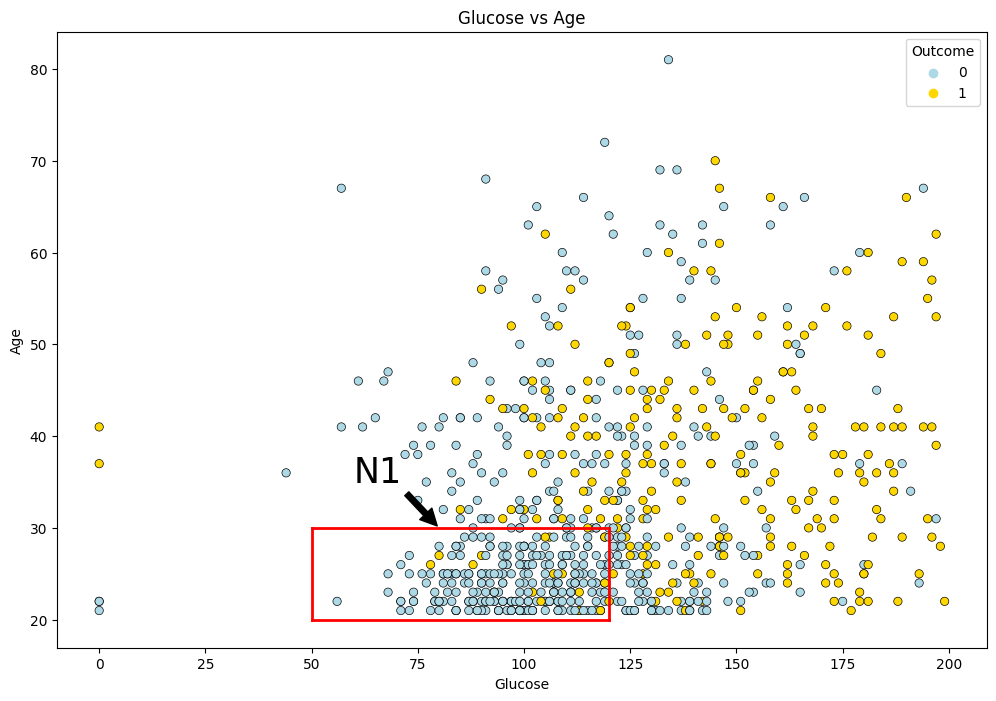

In [44]:
palette ={0 : 'lightblue', 1 : 'gold'}
edgecolor = 'black'

fig = plt.figure(figsize=(12,8))

ax1 = sns.scatterplot(x = df['Glucose'], y = df['Age'], hue = "Outcome",
                    data = df, palette = palette, edgecolor=edgecolor)

plt.annotate('N1', size=25, color='black', xy=(80, 30), xytext=(60, 35),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.plot([50, 120], [30, 30], linewidth=2, color = 'red')
plt.plot([120, 120], [20, 30], linewidth=2, color = 'red')
plt.plot([50, 120], [20, 20], linewidth=2, color = 'red')
plt.plot([50, 50], [20, 30], linewidth=2, color = 'red')
plt.title('Glucose vs Age')
plt.show()

In [45]:
df.loc[:,'N1']=0
df.loc[(df['Age']<=30) & (df['Glucose']<=120),'N1']=1


In [46]:
barplot('N1', ':Glucose <= 120 and Age <= 30')

In [47]:
plot_pie('N1', '(Glucose <= 120 and Age <= 30)')

In [49]:
df.loc[:,'N2']=0
df.loc[(df['BMI']<=30),'N2']=1
barplot('N2', ': BMI <= 30')

In [50]:
plot_pie('N2', 'BMI <= 30')

In [51]:
plot_feat1_feat2('Pregnancies','Age')

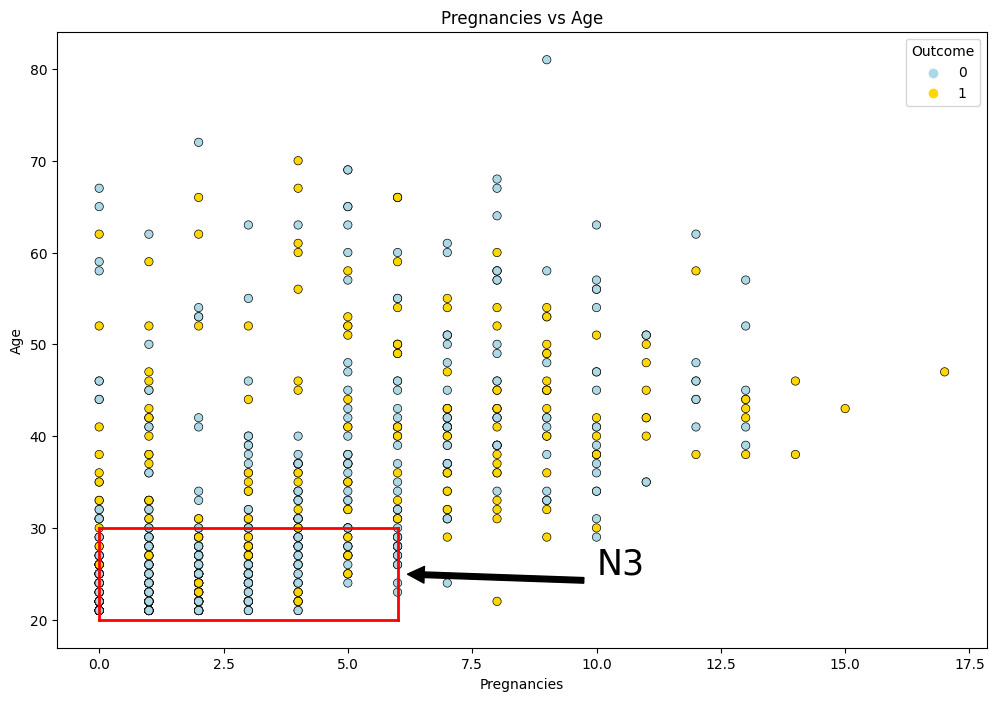

In [52]:
palette ={0 : 'lightblue', 1 : 'gold'}
edgecolor = 'black'

fig = plt.figure(figsize=(12,8))

ax1 = sns.scatterplot(x = df['Pregnancies'], y = df['Age'], hue = "Outcome",
                    data = df, palette = palette, edgecolor=edgecolor)

plt.annotate('N3', size=25, color='black', xy=(6, 25), xytext=(10, 25),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.plot([0, 6], [30, 30], linewidth=2, color = 'red')
plt.plot([6, 6], [20, 30], linewidth=2, color = 'red')
plt.plot([0, 6], [20, 20], linewidth=2, color = 'red')
plt.plot([0, 0], [20, 30], linewidth=2, color = 'red')
plt.title('Pregnancies vs Age')
plt.show()

In [53]:
df.loc[:,'N3']=0
df.loc[(df['Age']<=30) & (df['Pregnancies']<=6),'N3']=1
barplot('N3', ': Age <= 30 and Pregnancies <= 6')

In [54]:
plot_pie('N3', 'Age <= 30 and Pregnancies <= 6')

In [55]:
plot_feat1_feat2('Glucose','BloodPressure')

Healthy persons are concentrate with an blood pressure <= 80 and glucose <= 105.

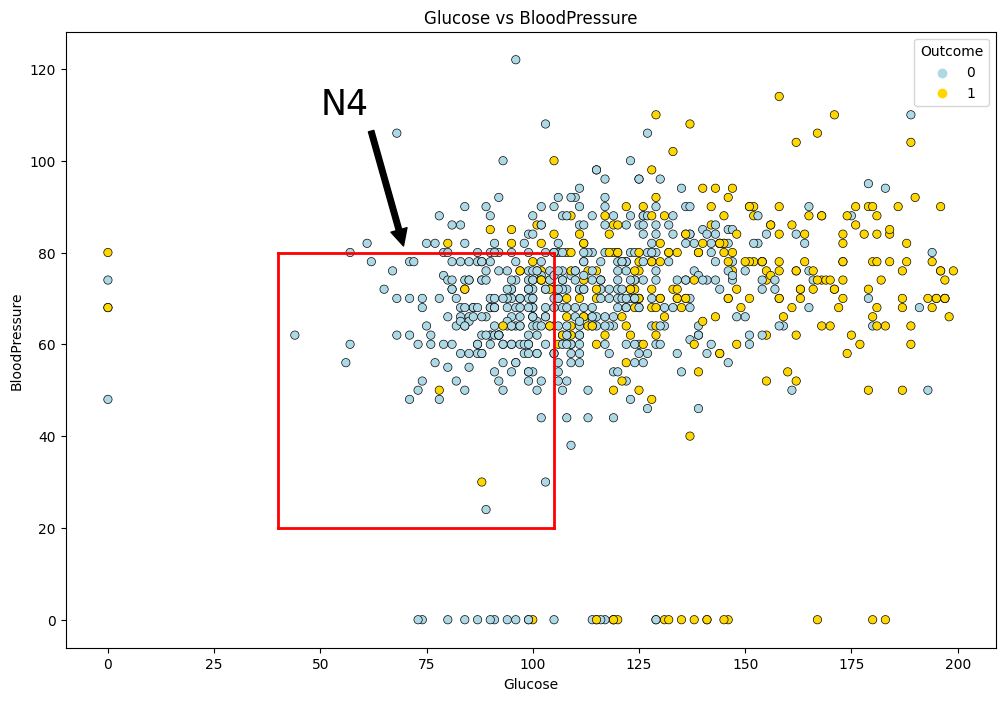

In [56]:
palette ={0 : 'lightblue', 1 : 'gold'}
edgecolor = 'black'

fig = plt.figure(figsize=(12,8))

ax1 = sns.scatterplot(x = df['Glucose'], y = df['BloodPressure'], hue = "Outcome",
                    data = df, palette = palette, edgecolor=edgecolor)

plt.annotate('N4', size=25, color='black', xy=(70, 80), xytext=(50, 110),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.plot([40, 105], [80, 80], linewidth=2, color = 'red')
plt.plot([40, 40], [20, 80], linewidth=2, color = 'red')
plt.plot([40, 105], [20, 20], linewidth=2, color = 'red')
plt.plot([105, 105], [20, 80], linewidth=2, color = 'red')
plt.title('Glucose vs BloodPressure')
plt.show()

In [57]:
df.loc[:,'N4']=0
df.loc[(df['Glucose']<=105) & (df['BloodPressure']<=80),'N4']=1
barplot('N4', ': Glucose <= 105 and BloodPressure <= 80')

In [58]:
plot_pie('N4', 'Glucose <= 105 and BloodPressure <= 80')

In [59]:
df.loc[:,'N5']=0
df.loc[(df['SkinThickness']<=20) ,'N5']=1
barplot('N5', ':SkinThickness <= 20')

In [60]:
plot_pie('N5', 'SkinThickness <= 20')

In [61]:
plot_feat1_feat2('SkinThickness','BMI')

Healthy persons are concentrate with a BMI < 30 and skin thickness <= 20.

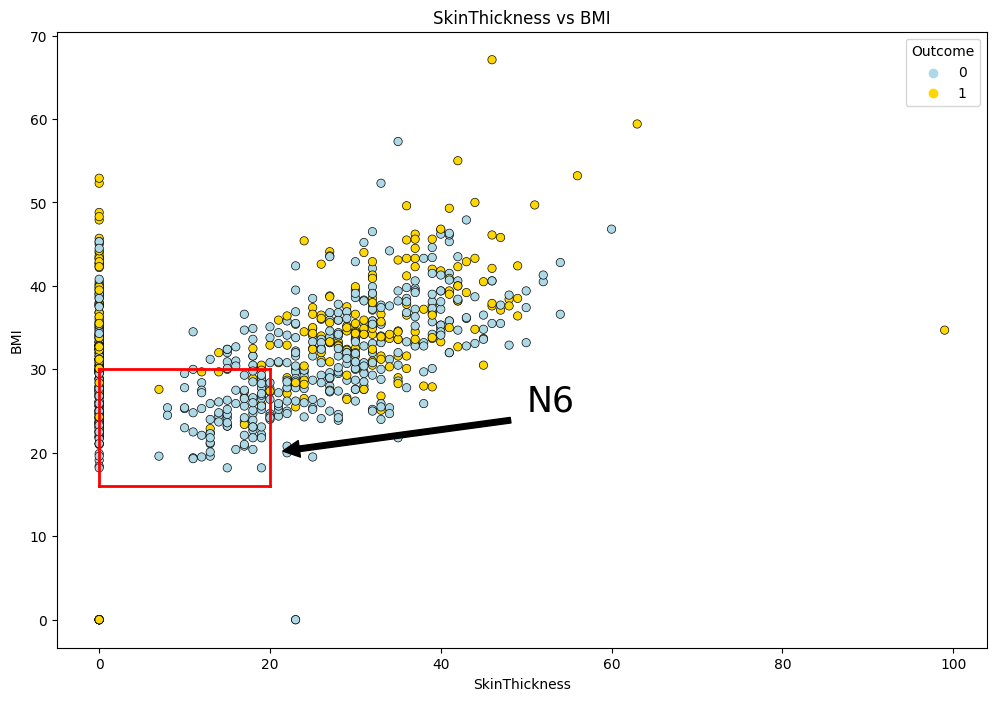

In [62]:
df.loc[:,'N6']=0
df.loc[(df['BMI']<30) & (df['SkinThickness']<=20),'N6']=1
palette ={0 : 'lightblue', 1 : 'gold'}
edgecolor = 'black'

fig = plt.figure(figsize=(12,8))

ax1 = sns.scatterplot(x = df['SkinThickness'], y = df['BMI'], hue = "Outcome",
                    data = df, palette = palette, edgecolor=edgecolor)

plt.annotate('N6', size=25, color='black', xy=(20, 20), xytext=(50, 25),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.plot([0, 20], [30, 30], linewidth=2, color = 'red')
plt.plot([0, 0], [16, 30], linewidth=2, color = 'red')
plt.plot([0, 20], [16, 16], linewidth=2, color = 'red')
plt.plot([20, 20], [16, 30], linewidth=2, color = 'red')
plt.title('SkinThickness vs BMI')
plt.show()

In [63]:
barplot('N6', ': BMI < 30 and SkinThickness <= 20')

In [64]:
plot_pie('N6', 'BMI < 30 and SkinThickness <= 20')

In [65]:
plot_feat1_feat2('Glucose','BMI')

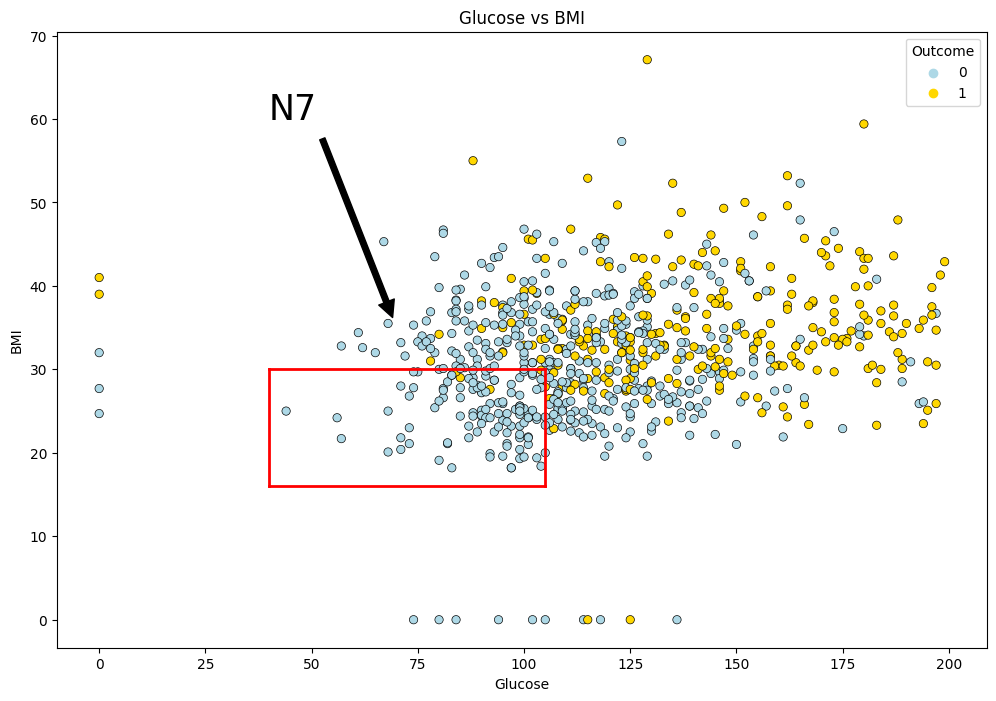

In [66]:
palette ={0 : 'lightblue', 1 : 'gold'}
edgecolor = 'black'

fig = plt.figure(figsize=(12,8))

ax1 = sns.scatterplot(x = df['Glucose'], y = df['BMI'], hue = "Outcome",
                    data = df, palette = palette, edgecolor=edgecolor)

plt.annotate('N7', size=25, color='black', xy=(70, 35), xytext=(40, 60),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.plot([105, 105], [16, 30], linewidth=2, color = 'red')
plt.plot([40, 40], [16, 30], linewidth=2, color = 'red')
plt.plot([40, 105], [16, 16], linewidth=2, color = 'red')
plt.plot([40, 105], [30, 30], linewidth=2, color = 'red')
plt.title('Glucose vs BMI')
plt.show()

In [67]:
df.loc[:,'N7']=0
df.loc[(df['Glucose']<=105) & (df['BMI']<=30),'N7']=1
barplot('N7', ': Glucose <= 105 and BMI <= 30')

In [68]:
plot_pie('N7', 'Glucose <= 105 and BMI <= 30')

In [69]:
plot_distribution('Insulin', 0)

In [70]:
df.loc[:,'N9']=0
df.loc[(df['Insulin']<200),'N9']=1
barplot('N9', ': Insulin < 200')

In [71]:
plot_pie('N9', 'Insulin < 200')

In [72]:
df.loc[:,'N10']=0
df.loc[(df['BloodPressure']<80),'N10']=1
barplot('N10', ': BloodPressure < 80')

In [73]:
plot_pie('N10', 'BloodPressure < 80')

In [74]:
plot_distribution('Pregnancies', 0)

In [75]:
df.loc[:,'N11']=0
df.loc[(df['Pregnancies']<4) & (df['Pregnancies']!=0) ,'N11']=1
barplot('N11', ': Pregnancies > 0 and < 4')

In [76]:
plot_pie('N11', 'Pregnancies > 0 and < 4')

In [77]:
df['N0'] = df['BMI'] * df['SkinThickness']

df['N8'] =  df['Pregnancies'] / df['Age']

df['N13'] = df['Glucose'] / df['DiabetesPedigreeFunction']

df['N12'] = df['Age'] * df['DiabetesPedigreeFunction']

df['N14'] = df['Age'] / df['Insulin']
D = df[(df['Outcome'] != 0)]
H = df[(df['Outcome'] == 0)]

In [78]:
plot_distribution('N0', 0)

In [79]:
df.loc[:,'N15']=0
df.loc[(df['N0']<1034) ,'N15']=1
barplot('N15', ': N0 < 1034')

In [80]:
plot_pie('N15', 'N0 < 1034')

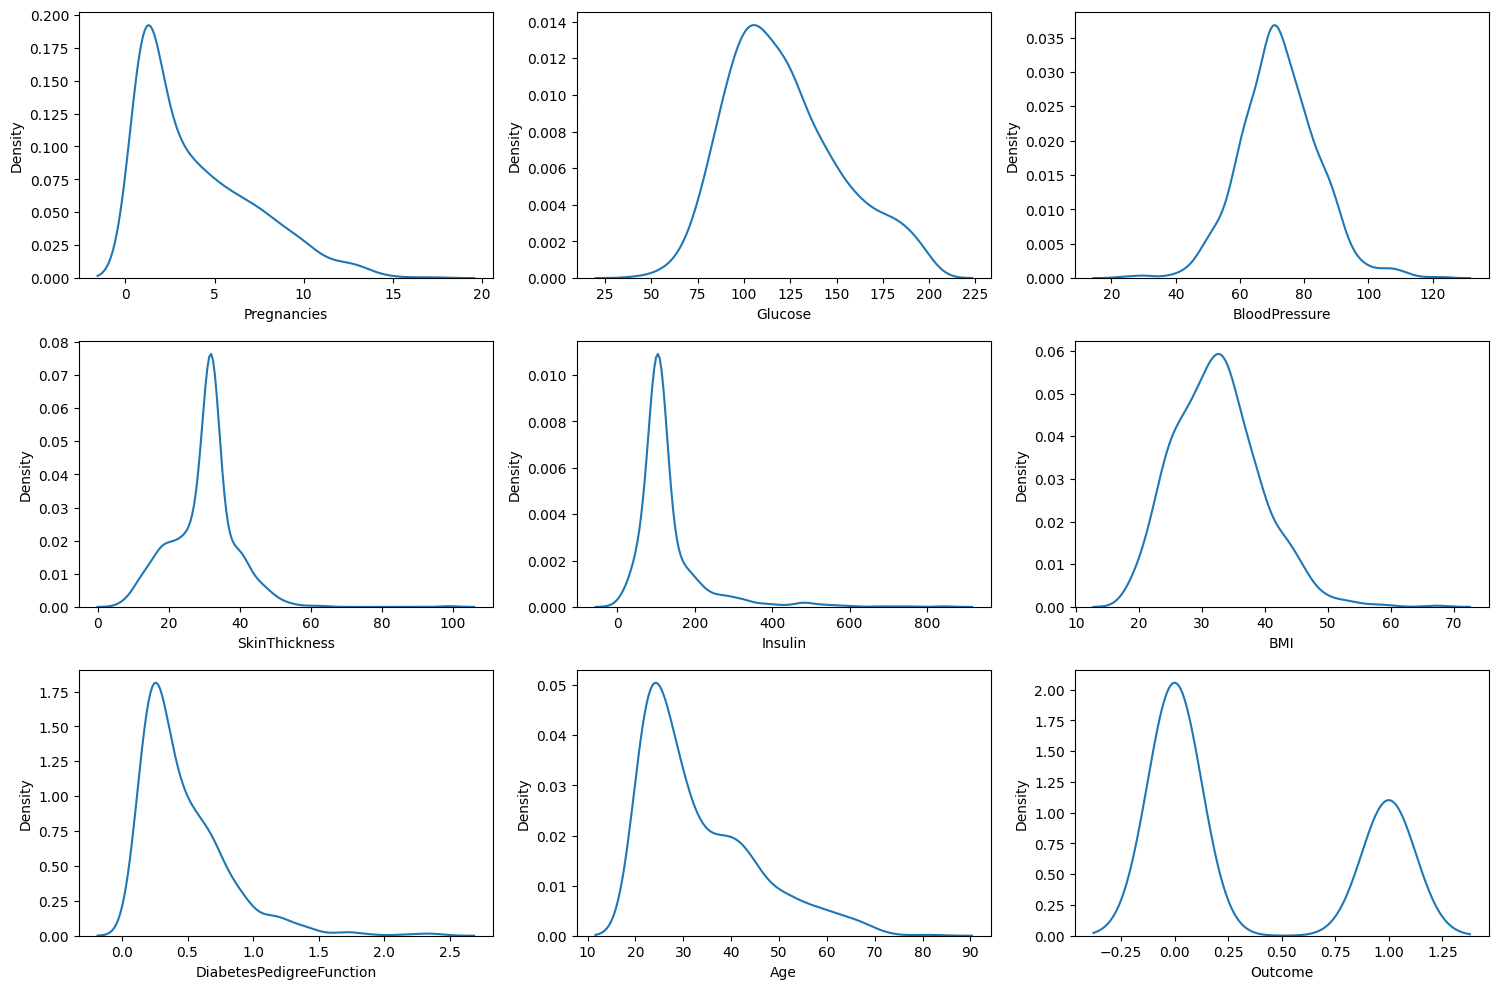

In [89]:
int_vars = df.select_dtypes(include=['int', 'float'])

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axs = axs.flatten()

# Iterate over columns up to the number of subplots available
for i, var in enumerate(int_vars.columns[:len(axs)]):
    sns.kdeplot(x=var, data=df, ax=axs[i])

plt.tight_layout()
plt.show()

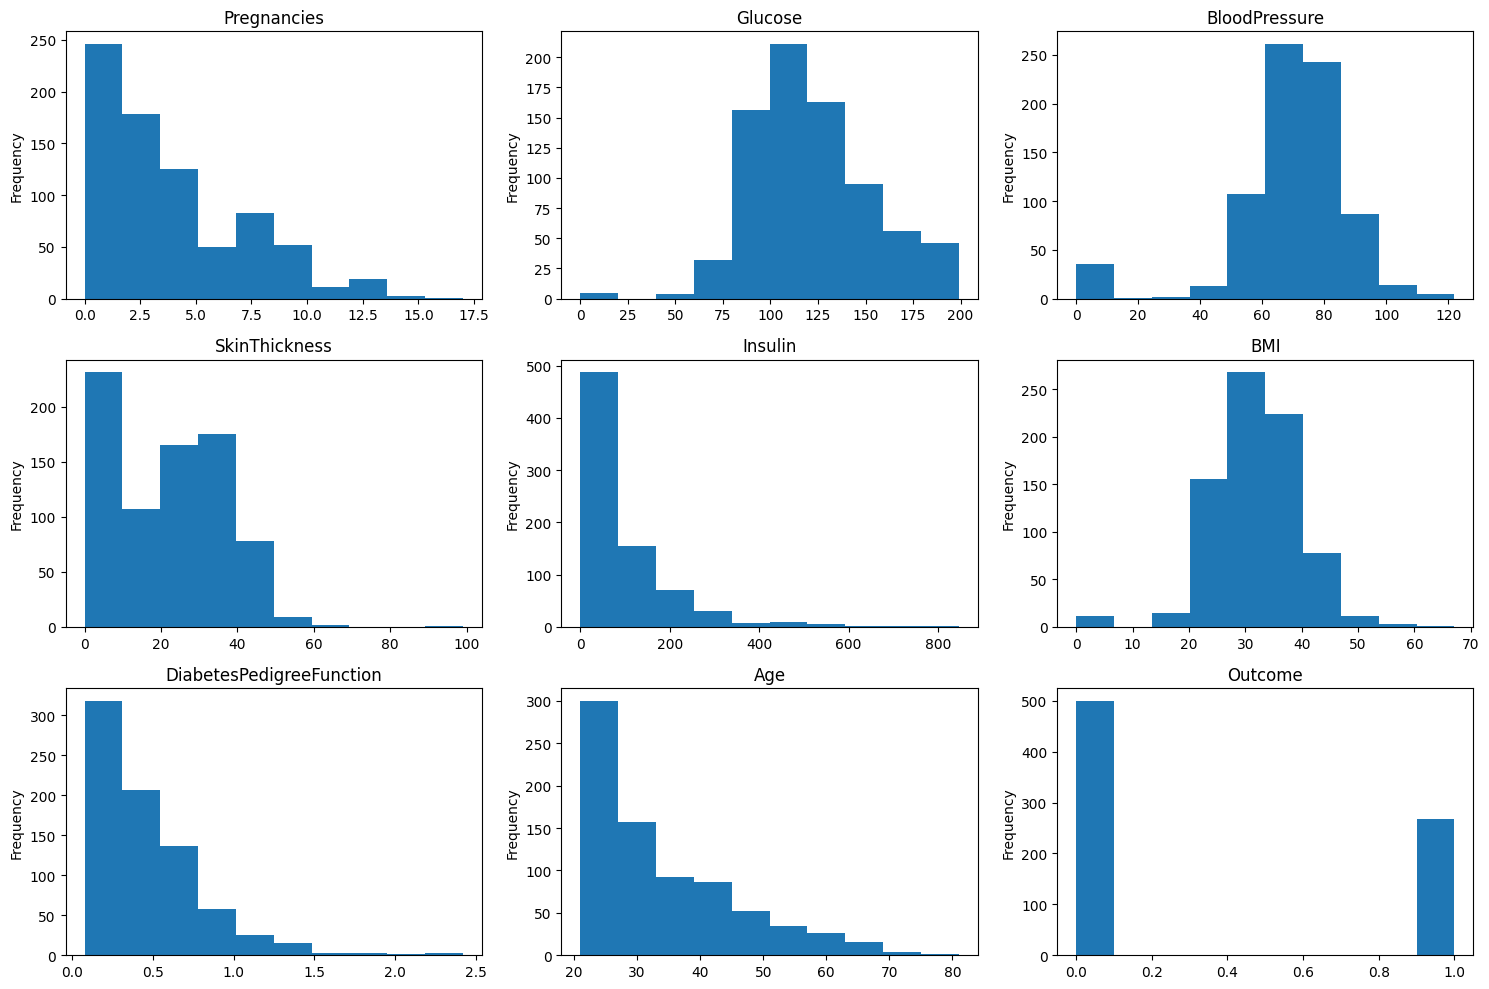

In [11]:
int_vars = df.select_dtypes(include = ['int','float'])

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axs = axs.flatten()

for i, var in enumerate(int_vars.columns[:len(axs)]):
    df[var].plot(kind='hist', ax=axs[i])
    axs[i].set_title(var)

plt.tight_layout()
plt.show()

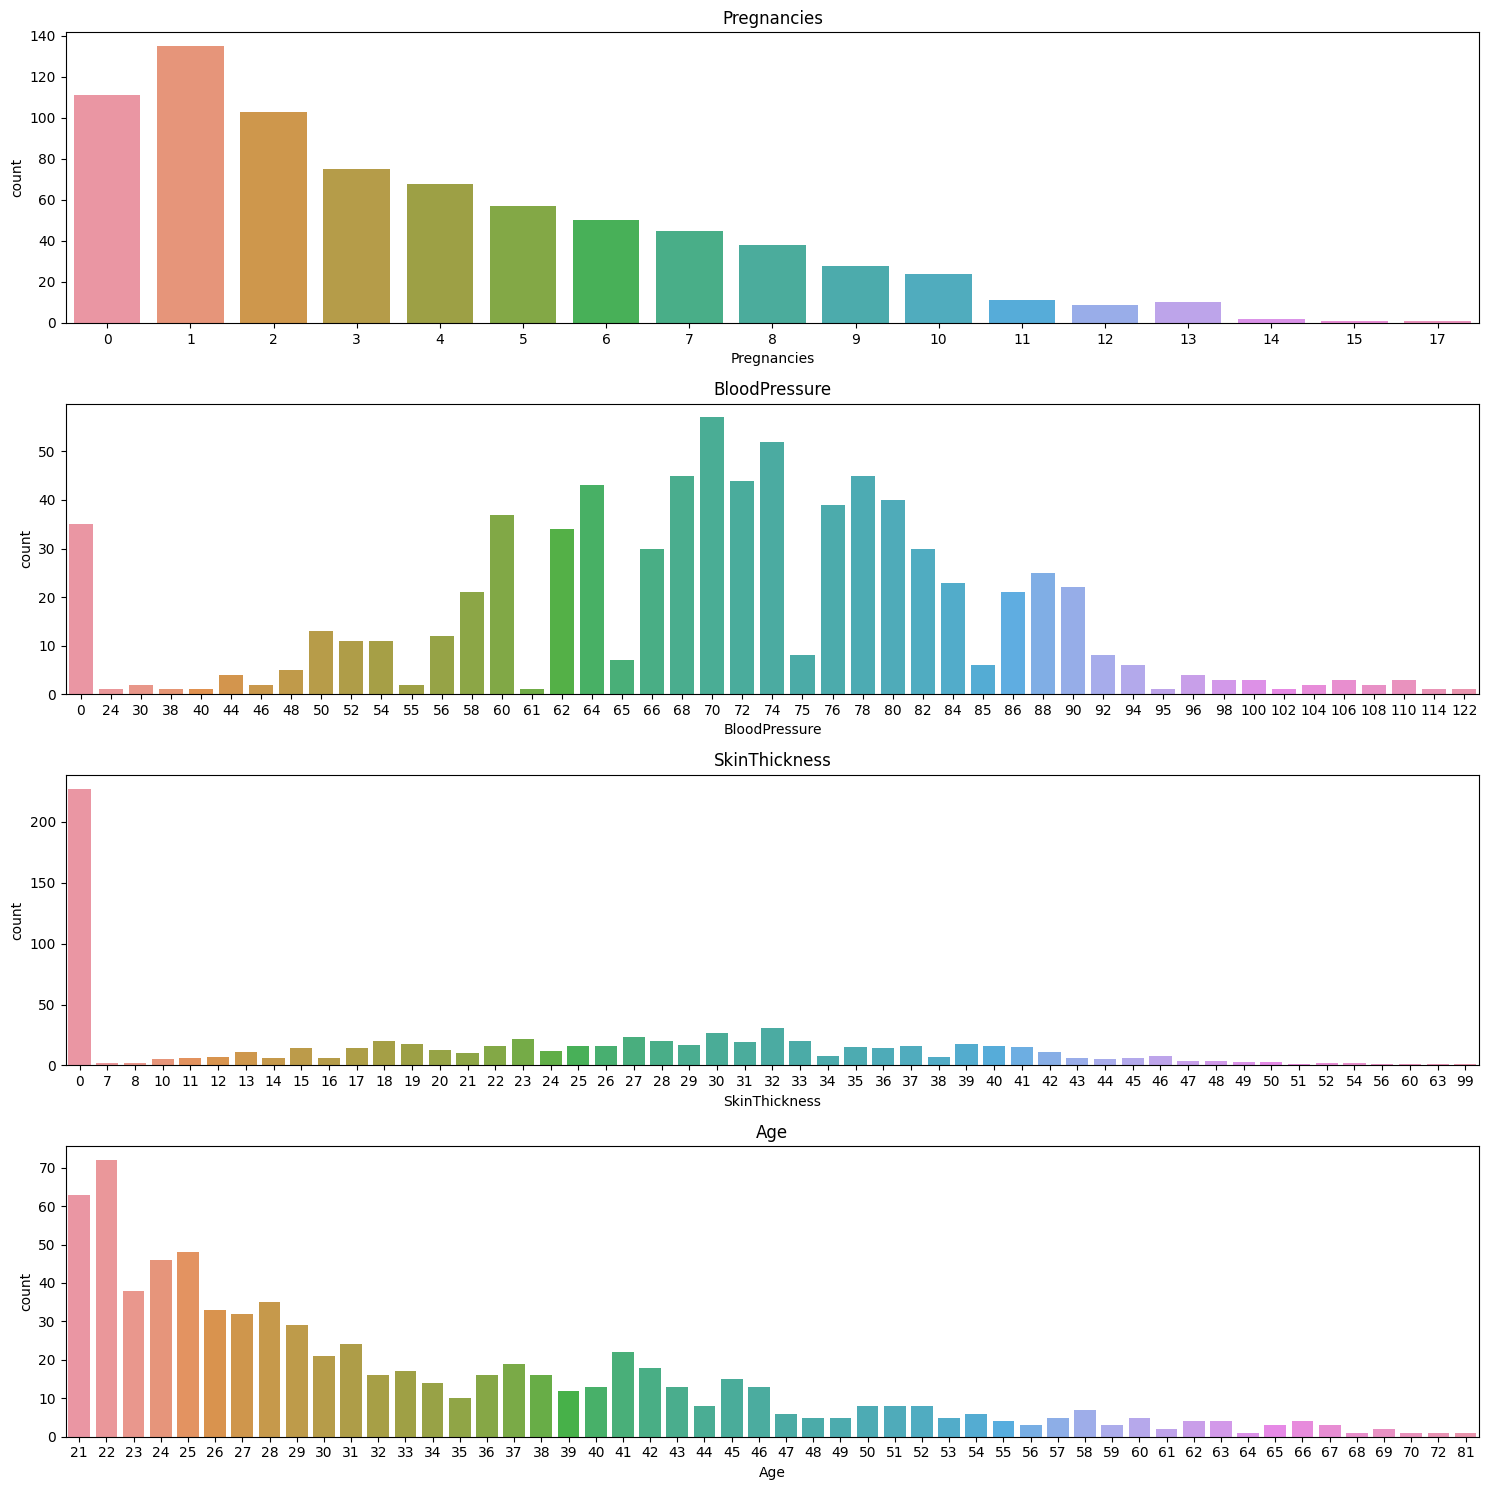

In [83]:
int_vars = ['Pregnancies','BloodPressure','SkinThickness','Age']

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(15,15))
axs = axs.flatten()

for i, var in enumerate (int_vars):
    sns.countplot(x=var,data=df,ax=axs[i])
    axs[i].set_title(var)

plt.tight_layout()
plt.show()

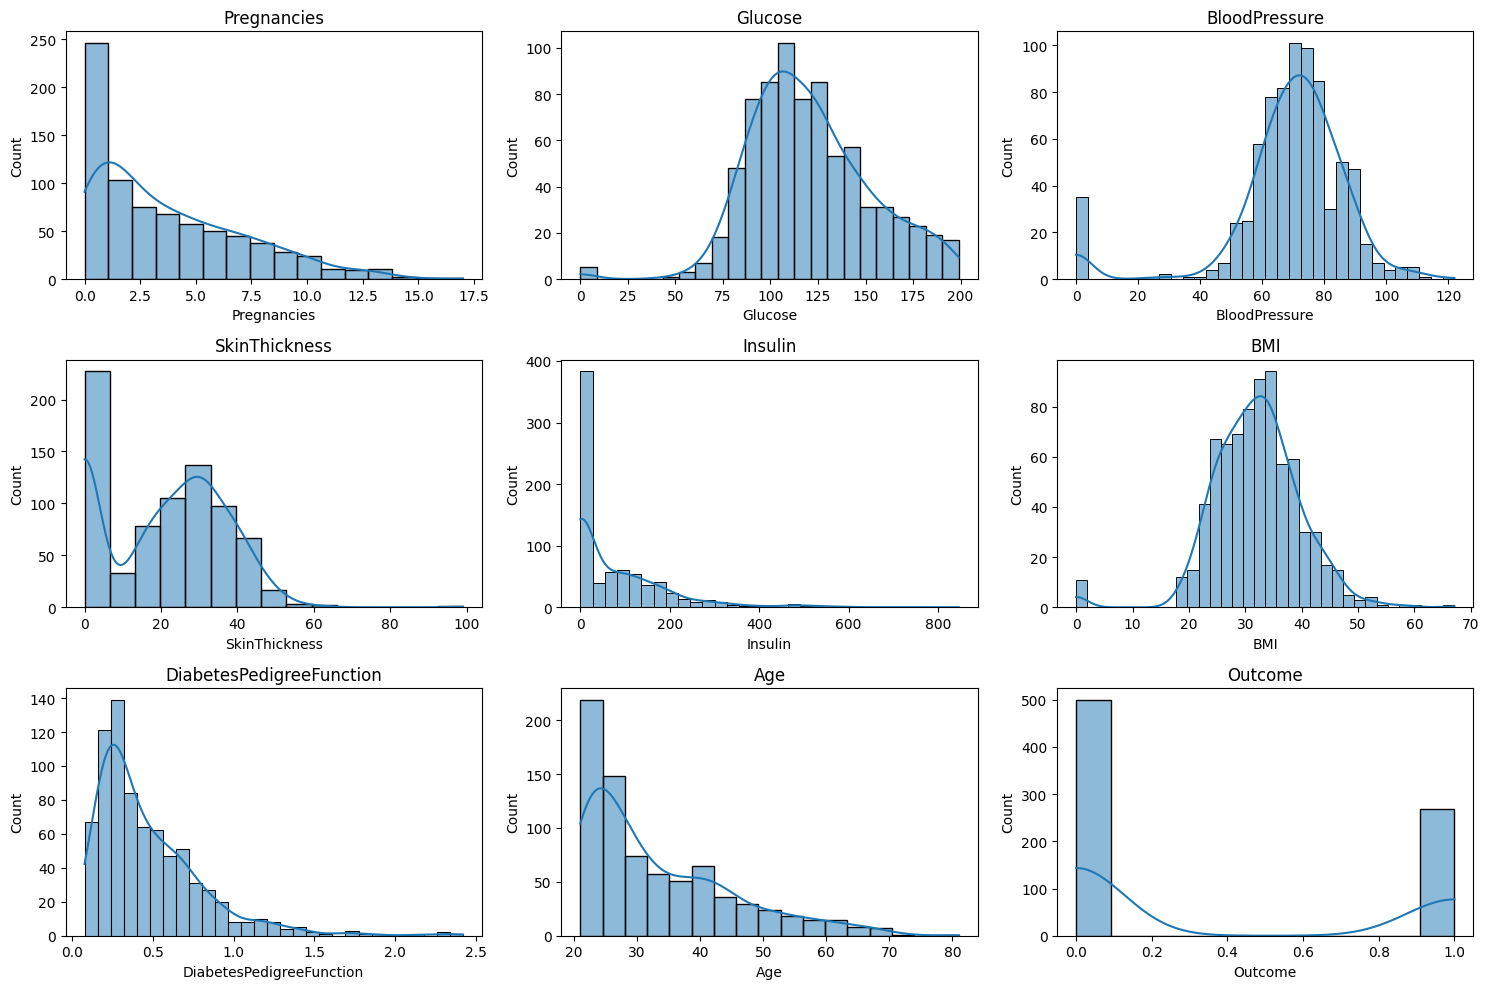

In [85]:
int_vars = df.select_dtypes(include = ['int','float'])

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
axs = axs.flatten()

for i, var in enumerate (int_vars.columns[:len(axs)]):
    sns.histplot(x=var,data=df,kde=True,ax=axs[i])
    axs[i].set_title(var)

plt.tight_layout()
plt.show()

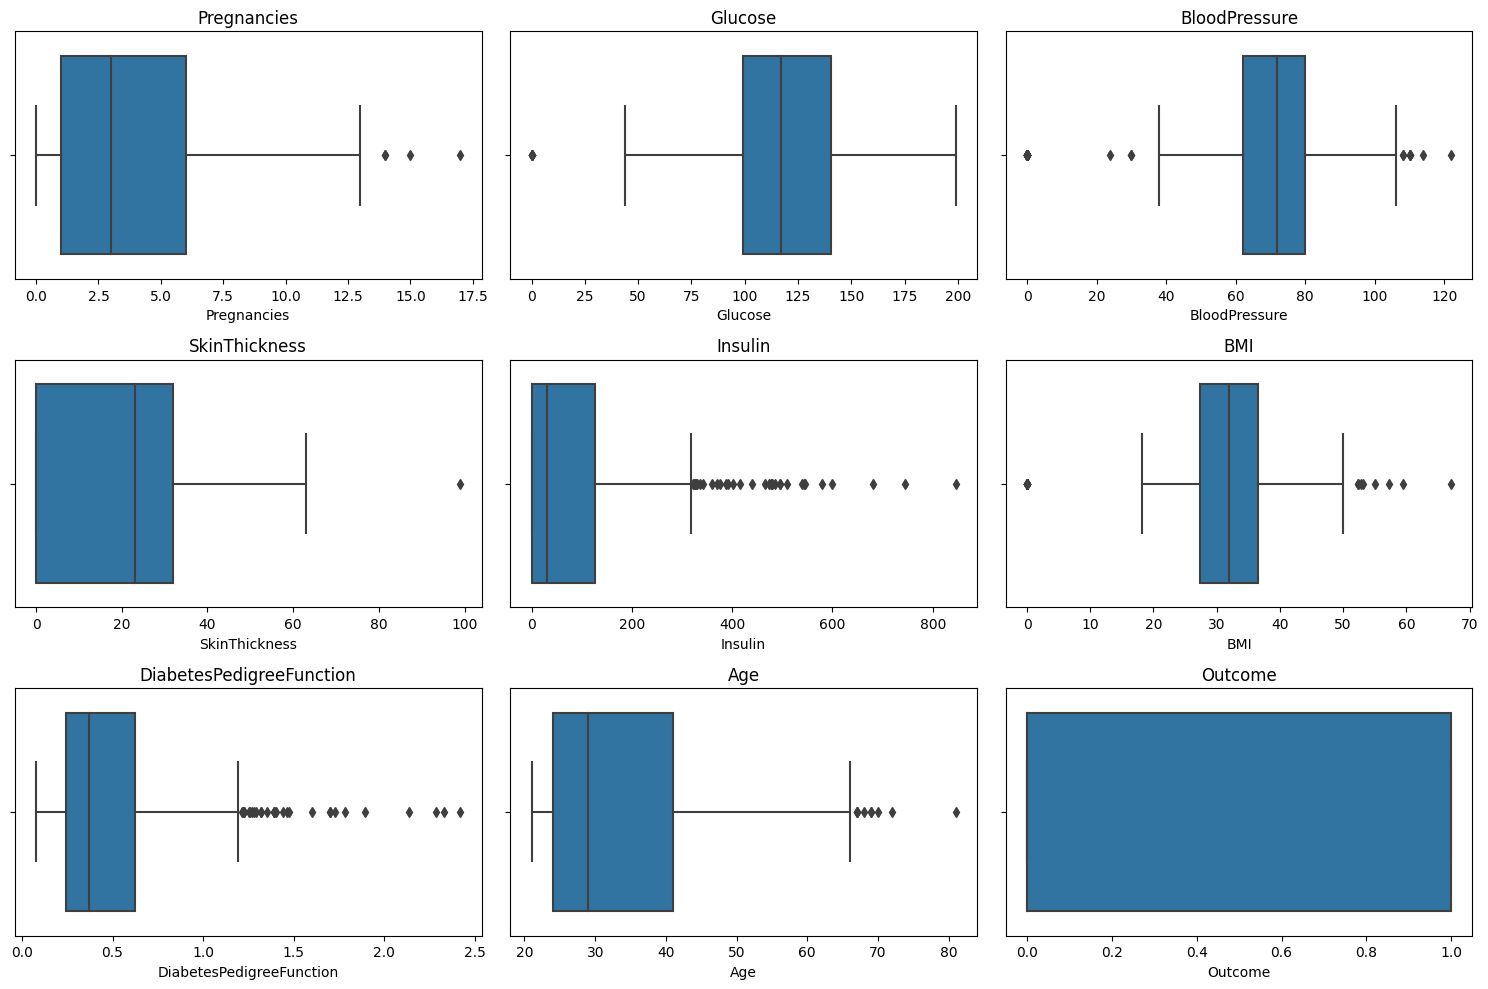

In [86]:
#outliers detection
int_vars = df.select_dtypes(include = ['int','float'])

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
axs = axs.flatten()

for i, var in enumerate (int_vars.columns[:len(axs)]):
    sns.boxplot(x=var,data=df,ax=axs[i])
    axs[i].set_title(var)

plt.tight_layout()
plt.show()

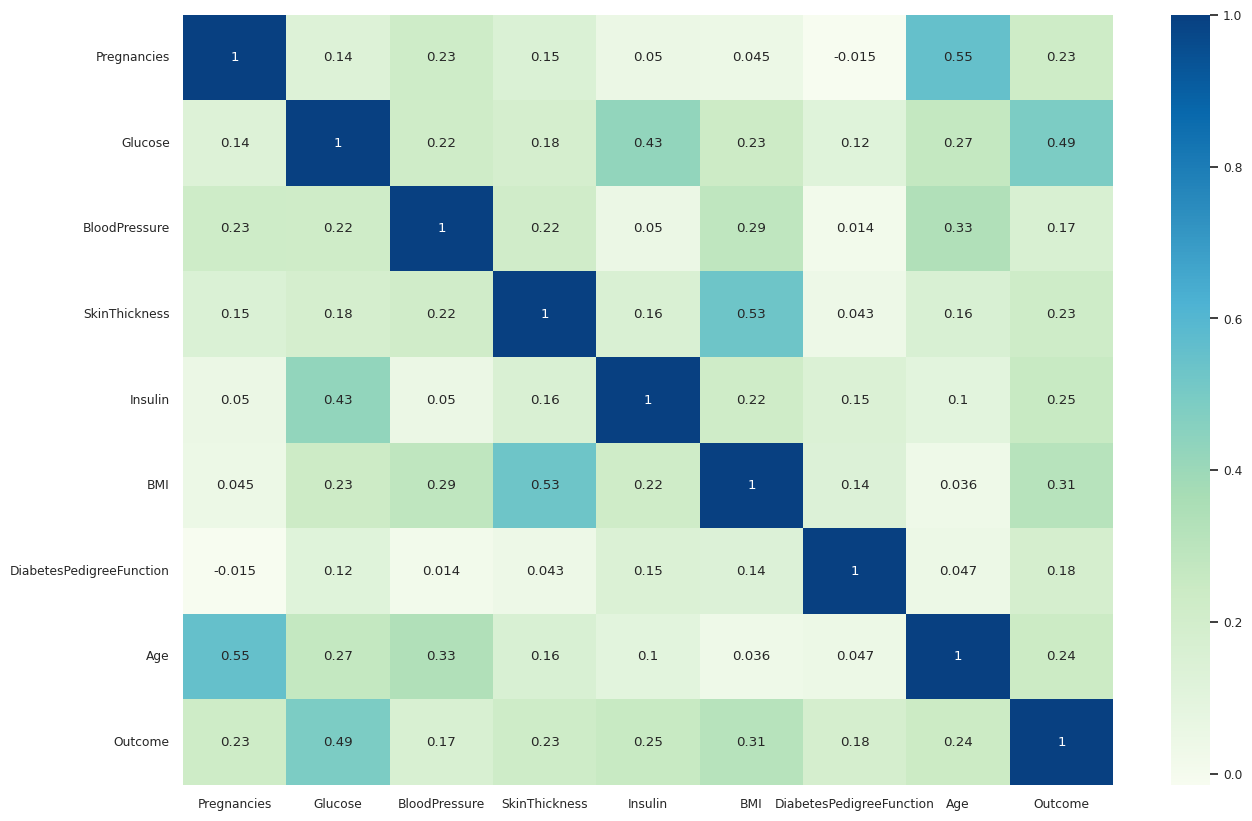

In [143]:
#co_relation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),fmt='.2g',annot=True,cmap='GnBu')
plt.show()

From correlation analysis we can see a relatively strong correlation between the outcome and Glucose, Age and BMI other metrics have weaker correlation

<ipython-input-144-a646b08e7014>:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



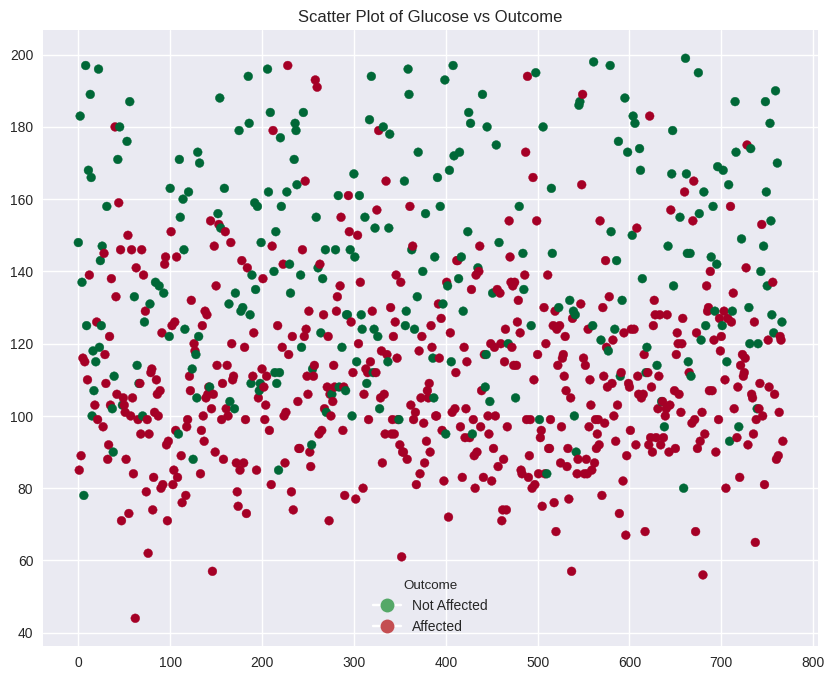

In [144]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(10, 8))

scatter = ax.scatter(df.index, df['Glucose'], c=df['Outcome'], cmap='RdYlGn', s=40)

legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='g', markersize=10, label='Not Affected'),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='r', markersize=10, label='Affected')]

ax.legend(handles=legend_elements, title='Outcome')

ax.set_title('Scatter Plot of Glucose vs Outcome')

plt.show()

In [20]:
Features_with_outliers=['Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin','BMI',
                        'DiabetesPedigreeFunction','Age']
def remove_outliers_iqr(data):

    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    data = np.where(data>upper_bound, upper_bound, np.where(data<lower_bound,lower_bound,data))

    return data[(data >= lower_bound) & (data <= upper_bound)]

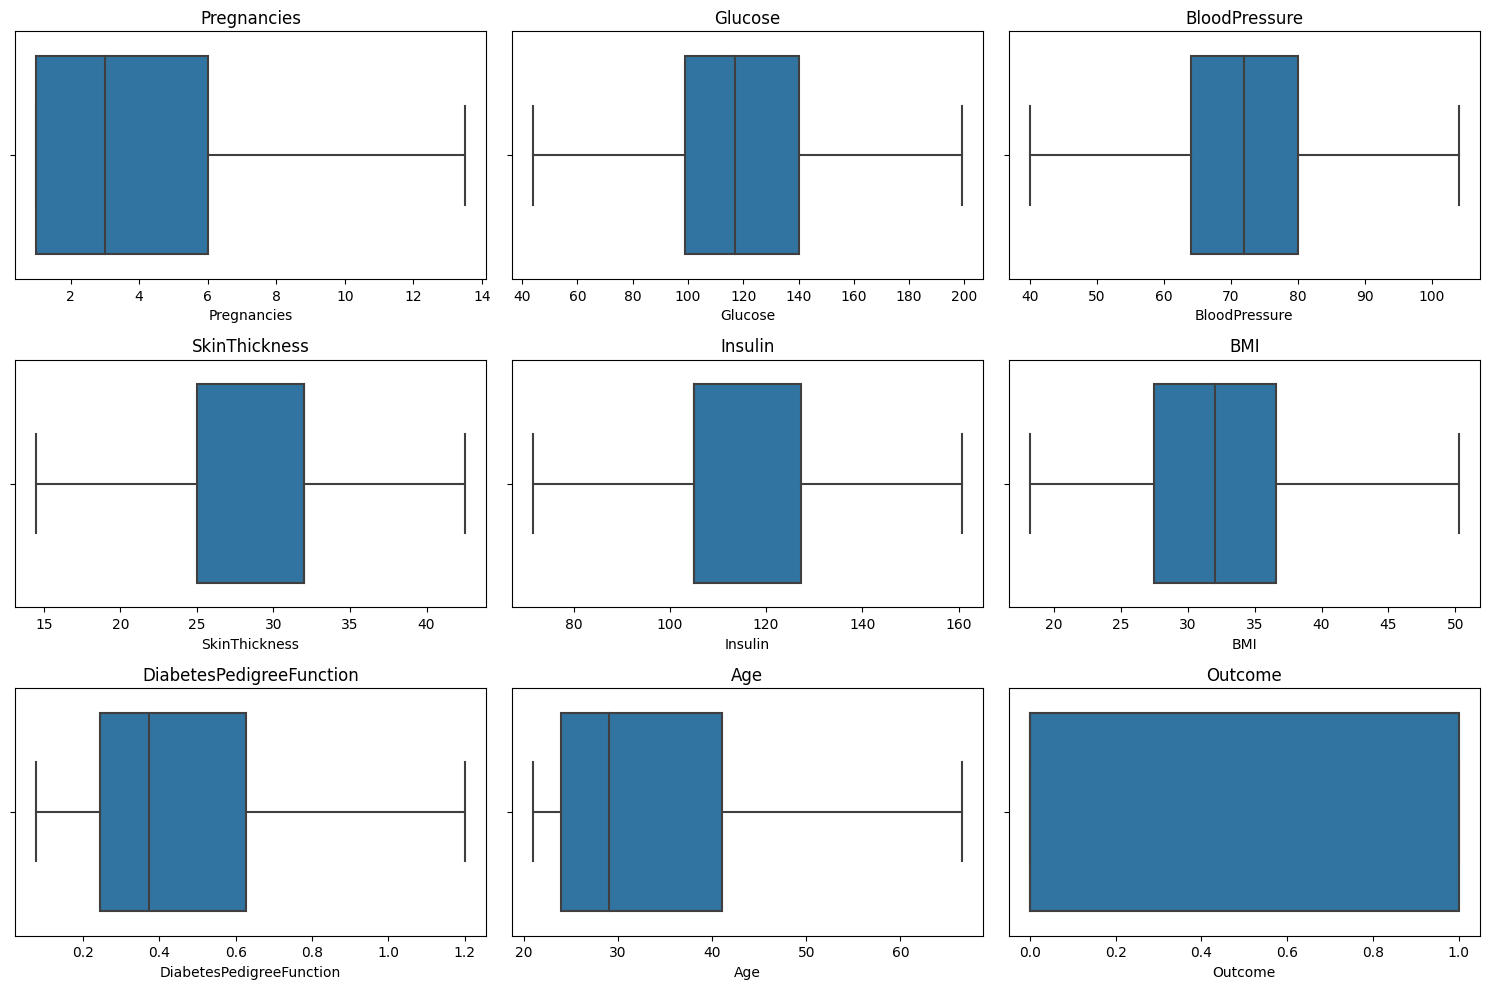

In [98]:
for column in Features_with_outliers:
    df[column] = remove_outliers_iqr(df[column])
#outliers detection
int_vars = df.select_dtypes(include = ['int','float'])

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
axs = axs.flatten()

for i, var in enumerate (int_vars.columns[:len(axs)]):
    sns.boxplot(x=var,data=df,ax=axs[i])
    axs[i].set_title(var)

plt.tight_layout()
plt.show()

[Text(0, 7.0, '63'),
 Text(0, 7.0, '72'),
 Text(0, 7.0, '38'),
 Text(0, 7.0, '46'),
 Text(0, 7.0, '48'),
 Text(0, 7.0, '33'),
 Text(0, 7.0, '32'),
 Text(0, 7.0, '35'),
 Text(0, 7.0, '29'),
 Text(0, 7.0, '21'),
 Text(0, 7.0, '24'),
 Text(0, 7.0, '16'),
 Text(0, 7.0, '17'),
 Text(0, 7.0, '14'),
 Text(0, 7.0, '10'),
 Text(0, 7.0, '16'),
 Text(0, 7.0, '19'),
 Text(0, 7.0, '16'),
 Text(0, 7.0, '12'),
 Text(0, 7.0, '13'),
 Text(0, 7.0, '22'),
 Text(0, 7.0, '18'),
 Text(0, 7.0, '13'),
 Text(0, 7.0, '8'),
 Text(0, 7.0, '15'),
 Text(0, 7.0, '13'),
 Text(0, 7.0, '6'),
 Text(0, 7.0, '5'),
 Text(0, 7.0, '5'),
 Text(0, 7.0, '8'),
 Text(0, 7.0, '8'),
 Text(0, 7.0, '8'),
 Text(0, 7.0, '5'),
 Text(0, 7.0, '6'),
 Text(0, 7.0, '4'),
 Text(0, 7.0, '3'),
 Text(0, 7.0, '5'),
 Text(0, 7.0, '7'),
 Text(0, 7.0, '3'),
 Text(0, 7.0, '5'),
 Text(0, 7.0, '2'),
 Text(0, 7.0, '4'),
 Text(0, 7.0, '4'),
 Text(0, 7.0, '1'),
 Text(0, 7.0, '3'),
 Text(0, 7.0, '4'),
 Text(0, 7.0, '9')]

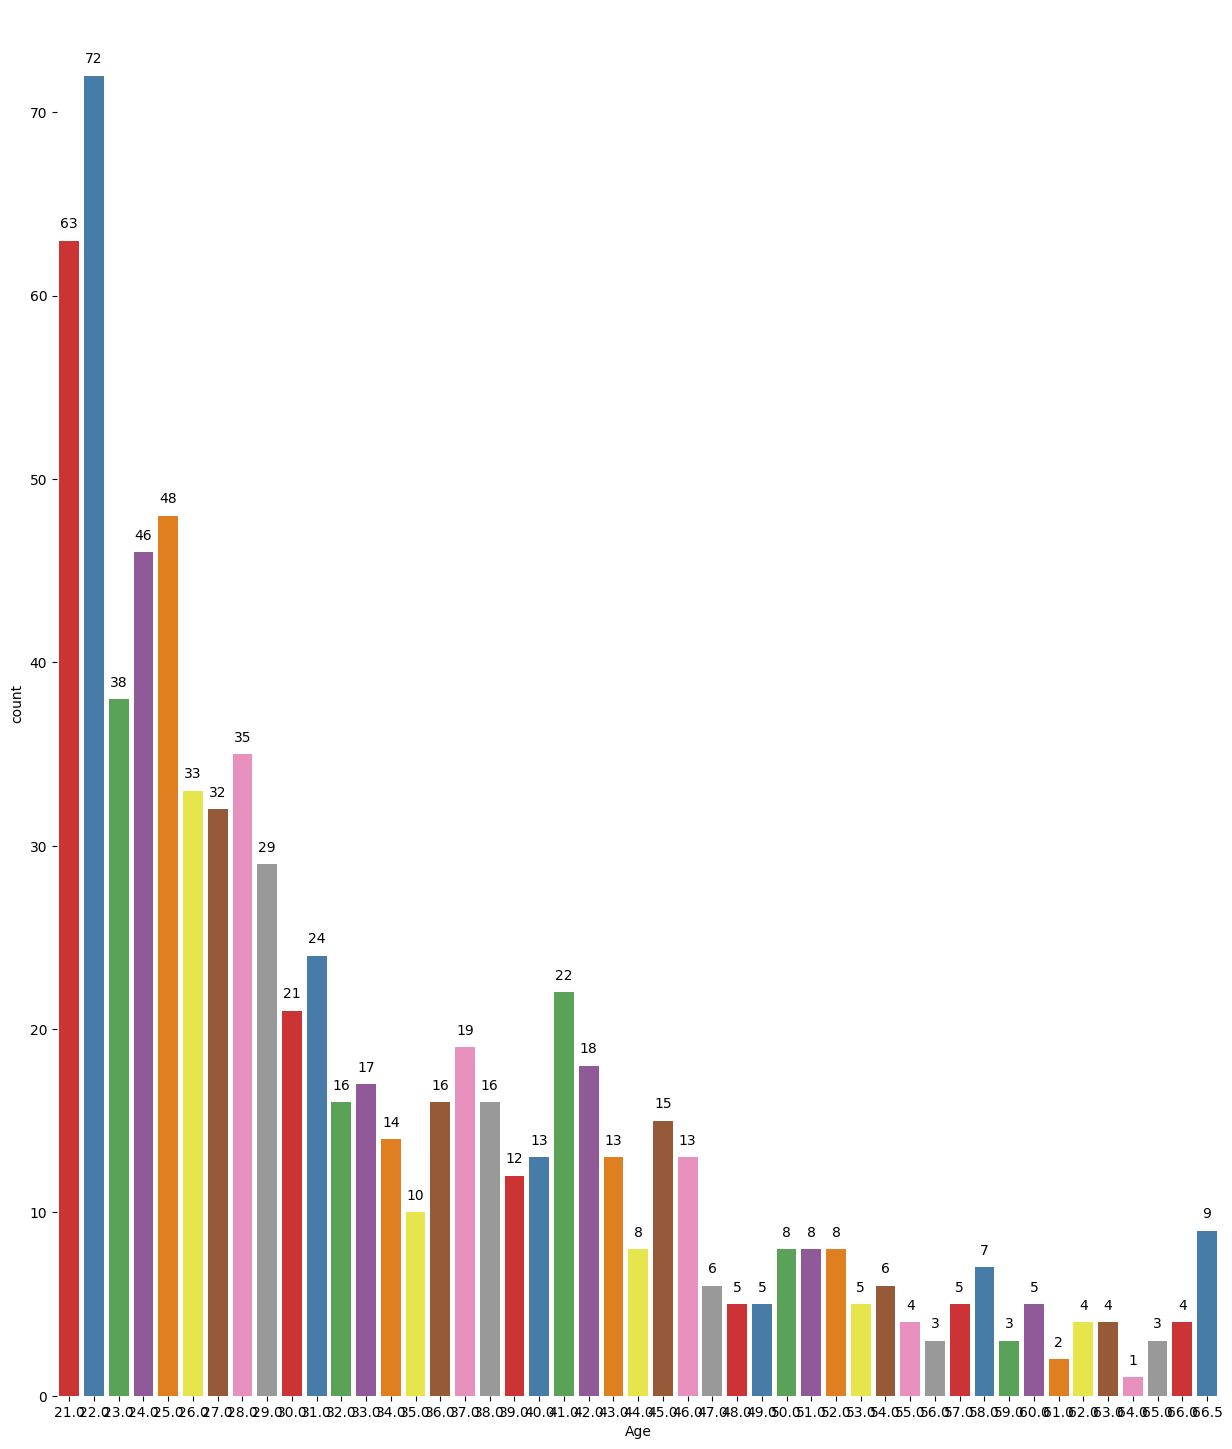

In [99]:
plt.figure(figsize=(15,18))
a=sns.countplot(data=df,x='Age',palette="Set1")
a.set(frame_on=False)
plt.bar_label(a.containers[0],padding=7.0)

In [100]:
correlation_matrix = df.corr()

# 1. Correlation between glucose levels and diabetes outcome
glucose_diabetes_corr = correlation_matrix.loc['Glucose', 'Outcome']

# 2. Correlation between age and diabetes outcome
age_diabetes_corr = correlation_matrix.loc['Age', 'Outcome']

print("Correlation Matrix:")
print(correlation_matrix)

print("\n1. Correlation between Glucose Levels and Diabetes Outcome:")
print(f"Correlation Coefficient: {glucose_diabetes_corr:.2f}")

print("\n2. Correlation between Age and Diabetes Outcome:")
print(f"Correlation Coefficient: {age_diabetes_corr:.2f}")

Correlation Matrix:
                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.136046       0.225600       0.149096   
Glucose                      0.136046  1.000000       0.222149       0.184664   
BloodPressure                0.225600  0.222149       1.000000       0.218970   
SkinThickness                0.149096  0.184664       0.218970       1.000000   
Insulin                      0.049991  0.426954       0.050318       0.158820   
BMI                          0.045330  0.233268       0.286560       0.531773   
DiabetesPedigreeFunction    -0.014547  0.119314       0.014219       0.042796   
Age                          0.553853  0.269972       0.334379       0.163041   
Outcome                      0.230182  0.491524       0.167055       0.225530   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.049991  0.045330                 -0.014547   
Glucose              

In [101]:
diabetes_by_age = df.groupby('Age')['Outcome'].mean()

print("\. Diabetes Prevalence by Age:")
print(diabetes_by_age)

\. Diabetes Prevalence by Age:
Age
21.0    0.079365
22.0    0.152778
23.0    0.184211
24.0    0.173913
25.0    0.291667
26.0    0.242424
27.0    0.250000
28.0    0.285714
29.0    0.448276
30.0    0.285714
31.0    0.541667
32.0    0.562500
33.0    0.588235
34.0    0.285714
35.0    0.500000
36.0    0.625000
37.0    0.315789
38.0    0.625000
39.0    0.250000
40.0    0.461538
41.0    0.590909
42.0    0.388889
43.0    0.846154
44.0    0.625000
45.0    0.533333
46.0    0.538462
47.0    0.666667
48.0    0.200000
49.0    0.600000
50.0    0.625000
51.0    0.625000
52.0    0.875000
53.0    0.800000
54.0    0.666667
55.0    0.250000
56.0    0.666667
57.0    0.200000
58.0    0.428571
59.0    0.666667
60.0    0.400000
61.0    0.500000
62.0    0.500000
63.0    0.000000
64.0    0.000000
65.0    0.000000
66.0    0.500000
66.5    0.222222
Name: Outcome, dtype: float64


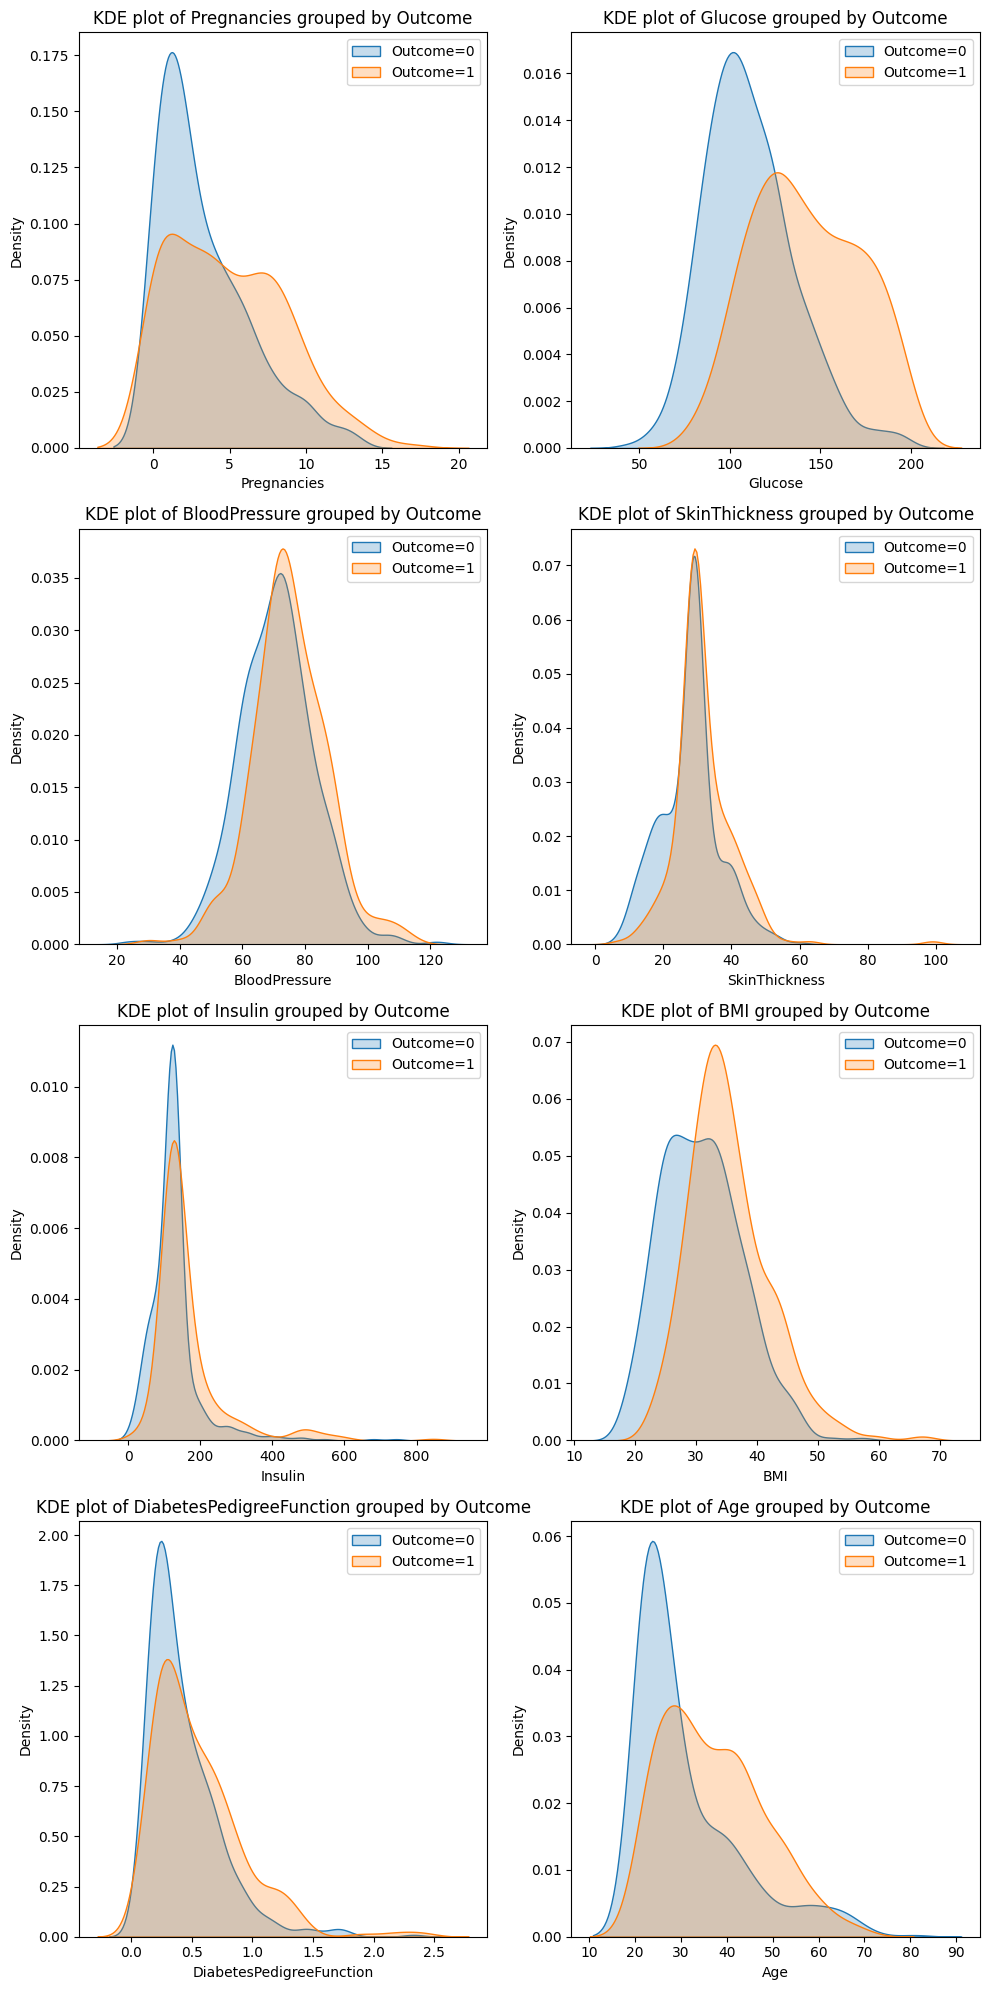

In [21]:
# Bivariate Analysis
# KDE plots for each variable grouped by the Outcome
num_columns = len(df.columns.drop('Outcome'))
num_rows = (num_columns + 1) // 2

plt.figure(figsize=(10, 5*num_rows))
for i, column in enumerate(df.columns.drop('Outcome')):
    plt.subplot(num_rows, 2, i+1)
    sns.kdeplot(data=df[df['Outcome']==0][column], label='Outcome=0', fill=True)
    sns.kdeplot(data=df[df['Outcome']==1][column], label='Outcome=1', fill=True)
    plt.title(f'KDE plot of {column} grouped by Outcome')
    plt.legend()

plt.tight_layout()
plt.show()

Pregnancies, Insulin, DiabetesPedigreeFunction and Age have positively or rightly skewed data distribution.

BloodPressure and Skin Thickness display a bidmodal data distribution.

Data distributions of Glucose & BMI are a bit tricky. This is because they near about highlight a normal distribution or bimodal distribution. This is because of the small peak present at the value 0.

For this notebook, we will consider these distributions as bimodal.

In [30]:
df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace = True)
df['Insulin'].fillna(df['Insulin'].median(), inplace = True)
df['BMI'].fillna(df['BMI'].median(), inplace = True)

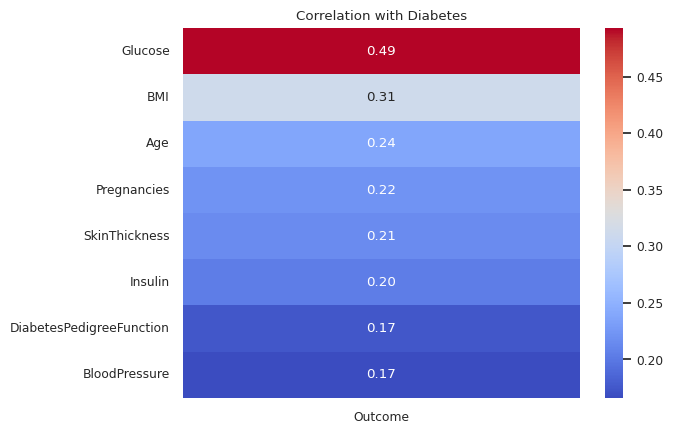

In [22]:
#Graph II
corr = df.corr()
target_corr = corr['Outcome'].drop('Outcome')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

# Create a heatmap of the correlations with the target column
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

The train-test split is a technique for evaluating the performance of a machine learning algorithm.

Train Dataset: Used to fit the machine learning model.

Test Dataset: Used to evaluate the fit machine learning model.

i have used 80% train and 20% test.

In [32]:
X = df.drop(columns=['Outcome','Insulin'])  # Drop the 'target' column to get the features
y = df['Outcome']  # Scelect only the 'target' column as the target variable
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)


In [33]:
from imblearn.over_sampling import SMOTE
oversampler = SMOTE()
X_over, y_over = oversampler.fit_resample(X_train, y_train)

In [25]:
X_over.shape,y_over.shape

((810, 7), (810,))

Standardize features by removing the mean and scaling to unit variance :



Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the set. Mean and standard deviation are then stored to be used on later data using the transform method.

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).

In [34]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [35]:
X_over_scaled = scalar.fit_transform(X_over)
X_test_scaled = scalar.transform(X_test)

In [36]:
from sklearn.metrics import classification_report

Performance Metrics :- Confusion Matrix, F1 Score, Precision Score, Recall Score

Confusion Matrix It is a tabular visualization of the model predictions versus the ground-truth labels.

F1 Score :- It’s the harmonic mean between precision and recall.


Precision Score Precision is the fraction of predicted positives/negatives events that are actually positive/negatives.


Recall Score It is the fraction of positives/negative events that you predicted correctly.


Preference is given more to F1 Scoring because :-

When you have a small positive class, then F1 score makes more sense.In this case the positive class number is almost half of the negative class.

F1-score is a better metric when there are imbalanced classes as in the above case.

F1 Score might be a better measure to use if we need to seek a balance between Precision and Recall

Random Forest is an ensemble learning method that can be used for both classification and regression tasks. It operates by constructing a multitude of decision trees at training time and outputs the class that is the mode of the classes (classification) or the mean prediction (regression) of the individual trees.

The "forest" references a collection of uncorrelated decision trees, which are then merged together to reduce variance and create more accurate data predictions.

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
pipeline = Pipeline([
    ('classifier', RandomForestClassifier())
])


param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],

}

grid_search = GridSearchCV(pipeline, param_grid, cv=5)

# Train the model
grid_search.fit(X_over_scaled,y_over)

# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Predictions on the test set
y_pred = best_model.predict(X_test_scaled)

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred)


Best Parameters:  {'classifier__max_depth': 20, 'classifier__n_estimators': 100}


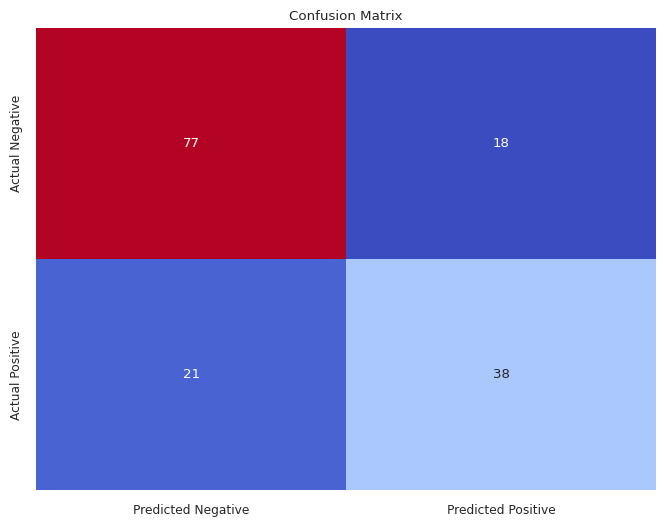

In [42]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.show()

In [42]:
model_names = []
accuracies = []

In [45]:
accuracies.append(ceil(accuracy))
model_names.append('Random Forest')

In [38]:
from math import ceil

Logistic Regression is a statistical method used for modeling the probability of a binary outcome.

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from math import ceil
log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_over_scaled,y_over)
model_names.append('Logistic Regression')
accuracies.append(ceil(log_reg.score(X_test_scaled,y_test)*100))
y_pred = log_reg.predict(X_test_scaled)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.81      0.75      0.78        95
           1       0.64      0.71      0.67        59

    accuracy                           0.73       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.74      0.73      0.74       154



In [39]:
from sklearn.metrics import confusion_matrix

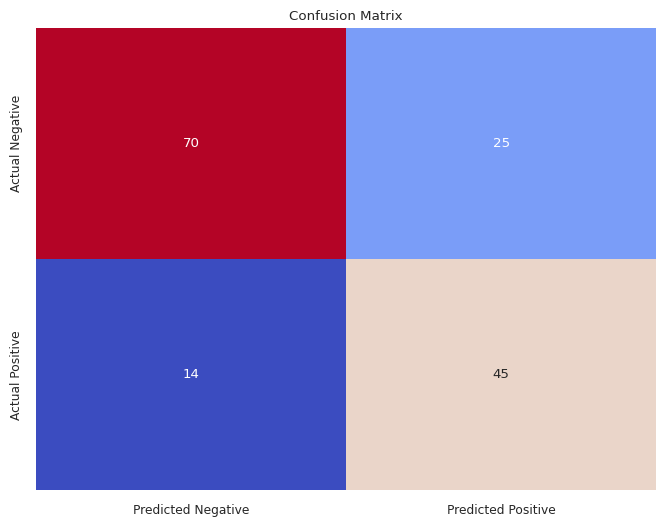

In [46]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.show()

KNN algorithm, is a non-parametric algorithm that classifies data points based on their proximity and association to other available data.

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
accuracy_rate = []
for i in range(1,16,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn,X_over_scaled,y_over,cv=3)
    accuracy_rate.append(score.mean())

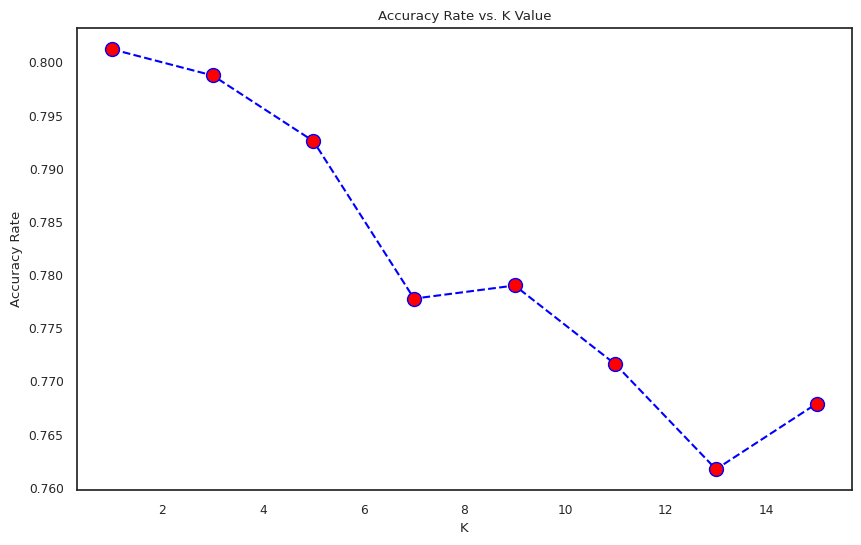

In [30]:
plt.figure(figsize=(10,6))
plt.plot(range(1,16,2),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K');
plt.ylabel('Accuracy Rate');

In [48]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_over_scaled,y_over)
model_names.append('KNeighborsClassifier')
accuracies.append(ceil(knn.score(X_test_scaled,y_test)*100))
y_pred = knn.predict(X_test_scaled)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.80      0.76        95
           1       0.61      0.51      0.56        59

    accuracy                           0.69       154
   macro avg       0.67      0.65      0.66       154
weighted avg       0.68      0.69      0.68       154



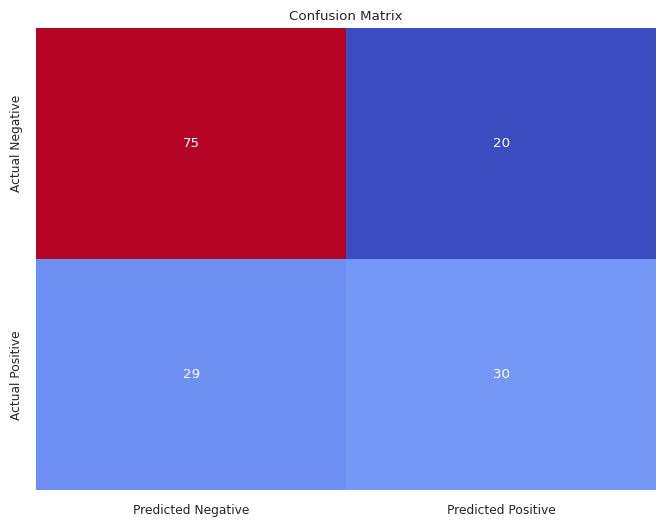

In [40]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.show()

A decision tree is a supervised machine learning algorithm used for both classification and regression tasks. It works by recursively splitting the dataset into subsets based on the most significant attribute at each node. The goal is to create a tree-like model that predicts the target variable by making decisions at each internal node and ultimately arriving at a leaf node with the predicted outcome.

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
parameter = {
    'criterion':["gini", "entropy", "log_loss"],
    'splitter' :["best", "random"],
    'max_depth':[1,2,3,4,5],
    'max_features':["auto", "sqrt", "log2"],
    'ccp_alpha':[1,2,3,4,5,6,7]
}

In [51]:
treemodel = DecisionTreeClassifier(max_depth=2)
cv = GridSearchCV(treemodel,param_grid=parameter,cv=5,scoring='accuracy')
cv.fit(X_over_scaled,y_over)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarn

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=2),
             param_grid={'ccp_alpha': [1, 2, 3, 4, 5, 6, 7],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [52]:
cv.best_params_

{'ccp_alpha': 1,
 'criterion': 'gini',
 'max_depth': 1,
 'max_features': 'auto',
 'splitter': 'best'}

In [53]:
y_pred = cv.predict(X_test_scaled)

In [54]:
model_names.append('Decision Tree')
accuracies.append(ceil(cv.score(X_test_scaled,y_test)*100))

In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      1.00      0.76        95
           1       0.00      0.00      0.00        59

    accuracy                           0.62       154
   macro avg       0.31      0.50      0.38       154
weighted avg       0.38      0.62      0.47       154



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



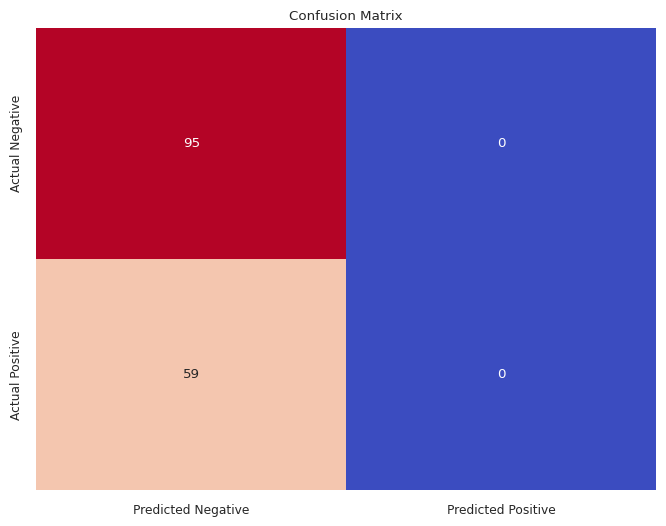

In [54]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.show()

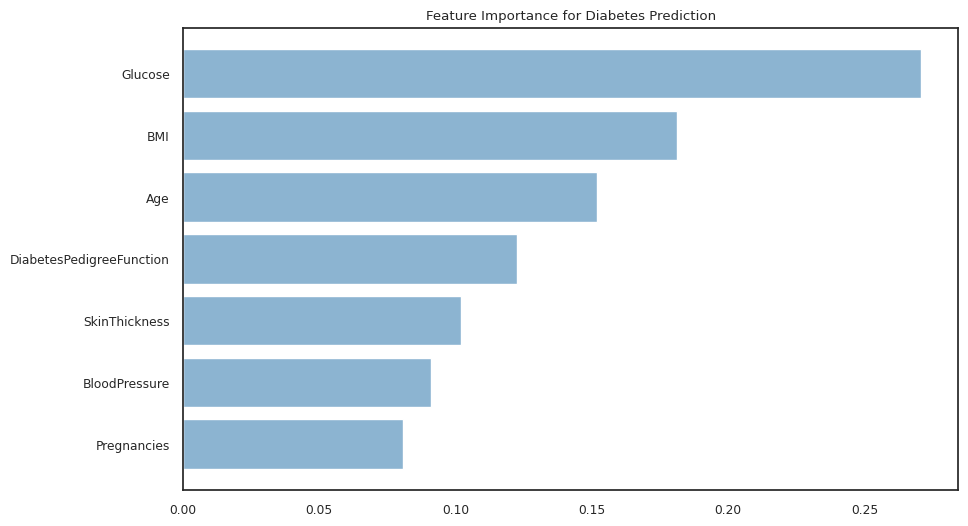

Ranked Features by Importance:
                    Feature  Importance
1                   Glucose    0.270819
4                       BMI    0.181375
6                       Age    0.151776
5  DiabetesPedigreeFunction    0.122428
3             SkinThickness    0.101936
2             BloodPressure    0.091086
0               Pregnancies    0.080580


In [55]:
from sklearn.ensemble import RandomForestClassifier
# Initialize a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model to your data
rf_classifier.fit(X_over_scaled, y_over)

# Get feature importances from the model
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to rank features by importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])

plt.title('Feature Importance for Diabetes Prediction')
plt.gca().invert_yaxis()
plt.show()

# Print ranked features by importance
print("Ranked Features by Importance:")
print(feature_importance_df)


Glucose is the most important feature.

These results, however, should be interpreted with caution. The importance of a feature in a Random Forest model doesn't necessarily mean a casual relationship, and it is specific to this model and this dataset. Other models might find different results. Additionally, low importance doesn't mean that the feature is unimportant for predicting diabetes in general, it may just mean that the feature is not useful in the presence of the other features. A thorough feature analysis should be considered for a better understanding of the contribution of each feature in the prediction.

In [129]:
# 1. Specific Risk Factors Analysis (e.g., glucose levels and BMI)
# Group the data by diabetes outcome (0 for non-diabetic, 1 for diabetic) and calculate means
risk_factors_by_diabetes = df.groupby('Outcome')[['Glucose', 'BMI']].mean()

print("1. Specific Risk Factors Analysis:")
print(risk_factors_by_diabetes)

# 2. Correlation between DiabetesPedigreeFunction and diabetes risk
correlation_dpf_diabetes = df[['DiabetesPedigreeFunction', 'Outcome']].corr().iloc[0, 1]

print("\n2. Correlation between DiabetesPedigreeFunction and Diabetes Risk:")
print(f"Correlation Coefficient: {correlation_dpf_diabetes:.2f}")

1. Specific Risk Factors Analysis:
            Glucose       BMI
Outcome                      
0        110.574000  30.86200
1        141.996269  35.23806

2. Correlation between DiabetesPedigreeFunction and Diabetes Risk:
Correlation Coefficient: 0.18


In [130]:
age_diabetes_likelihood = df.groupby('Age')['Outcome'].mean()
max_diabetes_likelihood_age = age_diabetes_likelihood.idxmax()
max_diabetes_likelihood_value = age_diabetes_likelihood.max()

print("1. Age Impact on Likelihood of Diabetes:")
print(age_diabetes_likelihood)

print("\n2. Age Group at Higher Risk:")
print(f"The age group at the highest risk is around age {max_diabetes_likelihood_age}, with a likelihood of {max_diabetes_likelihood_value:.2f}")

1. Age Impact on Likelihood of Diabetes:
Age
21.0    0.079365
22.0    0.152778
23.0    0.184211
24.0    0.173913
25.0    0.291667
26.0    0.242424
27.0    0.250000
28.0    0.285714
29.0    0.448276
30.0    0.285714
31.0    0.541667
32.0    0.562500
33.0    0.588235
34.0    0.285714
35.0    0.500000
36.0    0.625000
37.0    0.315789
38.0    0.625000
39.0    0.250000
40.0    0.461538
41.0    0.590909
42.0    0.388889
43.0    0.846154
44.0    0.625000
45.0    0.533333
46.0    0.538462
47.0    0.666667
48.0    0.200000
49.0    0.600000
50.0    0.625000
51.0    0.625000
52.0    0.875000
53.0    0.800000
54.0    0.666667
55.0    0.250000
56.0    0.666667
57.0    0.200000
58.0    0.428571
59.0    0.666667
60.0    0.400000
61.0    0.500000
62.0    0.500000
63.0    0.000000
64.0    0.000000
65.0    0.000000
66.0    0.500000
66.5    0.222222
Name: Outcome, dtype: float64

2. Age Group at Higher Risk:
The age group at the highest risk is around age 52.0, with a likelihood of 0.88


In [131]:
import plotly.express as px
# 1. Age impact on the likelihood of diabetes
# Group the data by age and calculate the mean diabetes outcome
age_diabetes_likelihood = df.groupby('Age')['Outcome'].mean().reset_index()

# Create an interactive line plot with Plotly
fig = px.line(
    age_diabetes_likelihood,
    x='Age',
    y='Outcome',
    labels={'Age': 'Age', 'Outcome': 'Diabetes Likelihood (Mean)'},
    title='Age vs. Diabetes Likelihood',
)

# Customize the plot appearance (black line)
fig.update_traces(line=dict(color='black'))

# Make the plot interactive
fig.show()

In [132]:
# Calculate the percentage of individuals with diabetes (Outcome = 1)
diabetes_percentage = (df['Outcome'] == 1).mean() * 100

# Calculate the average age of individuals in the dataset
average_age = df['Age'].mean()

# Calculate the average BMI of individuals in the dataset
average_bmi = df['BMI'].mean()

# Determine the age group at higher risk of diabetes
age_diabetes_likelihood = df.groupby('Age')['Outcome'].mean()
max_diabetes_likelihood_age = age_diabetes_likelihood.idxmax()
max_diabetes_likelihood_value = age_diabetes_likelihood.max()

# Generate insights and recommendations
insights = []

if diabetes_percentage > 0:
    insights.append(f"{diabetes_percentage:.2f}% of individuals in the dataset have diabetes.")

insights.append(f"The average age of individuals in the dataset is approximately {average_age:.2f} years.")
insights.append(f"The average BMI of individuals in the dataset is approximately {average_bmi:.2f}.")

if max_diabetes_likelihood_value > 0:
    insights.append(f"The age group at the highest risk of diabetes is around age {max_diabetes_likelihood_age}, with a likelihood of {max_diabetes_likelihood_value:.2f}.")

# Print insights and recommendations
for i, insight in enumerate(insights, start=1):
    print(f"{i}. {insight}")

1. 34.90% of individuals in the dataset have diabetes.
2. The average age of individuals in the dataset is approximately 33.20 years.
3. The average BMI of individuals in the dataset is approximately 32.39.
4. The age group at the highest risk of diabetes is around age 52.0, with a likelihood of 0.88.


In [133]:
# Define a custom blue color
blue_color = '#0000FF'  # Hex color code for blue

# 1. Distribution of BMI for diabetic vs. non-diabetic individuals
fig_bmi_distribution = px.histogram(
    df,
    x='BMI',
    color='Outcome',  # Color by diabetes outcome (0 for non-diabetic, 1 for diabetic)
    labels={'BMI': 'BMI', 'count': 'Frequency'},
    title='Distribution of BMI by Diabetes Outcome',
    color_discrete_sequence=[blue_color]  # Set the color to blue
)

# 2. Compare the distributions of other attributes between the two groups
attributes_to_compare = ['Glucose', 'BloodPressure', 'Age']

fig_attributes_comparison = px.box(
    df,
    x='Outcome',
    y=attributes_to_compare,
    labels={'Outcome': 'Diabetes Outcome', 'variable': 'Attribute', 'value': 'Value'},
    title='Comparison of Attribute Distributions by Diabetes Outcome',
    color='Outcome',
    color_discrete_sequence=[blue_color]  # Set the color to blue
)

# Display the plots
fig_bmi_distribution.show()
fig_attributes_comparison.show()

In [134]:
scatter_matrix = px.scatter_matrix(
    df,
    dimensions=['Insulin', 'SkinThickness', 'Outcome'],  # Variables to plot
    color='Outcome',  # Color by diabetes outcome (0 for non-diabetic, 1 for diabetic)
    labels={'Insulin': 'Insulin', 'SkinThickness': 'Skin Thickness', 'Outcome': 'Diabetes Outcome'},
    title='Scatter Plot Matrix: Insulin vs. Skin Thickness by Diabetes Outcome'
)

# Customize the layout of the scatter plot matrix
scatter_matrix.update_traces(marker=dict(size=5))  # Adjust marker size for better visibility

# Display the scatter plot matrix
scatter_matrix.show()

In [135]:
# Define custom colors
blue_color = '#0000FF'  # Hex color code for blue
purple_color = '#800080'  # Hex color code for purple

# 1. Explore the relationships with diabetes likelihood
fig_risk_factors = px.scatter_matrix(
    df,
    dimensions=['Glucose', 'BMI', 'Age', 'Insulin'],
    color='Outcome',  # Color by diabetes outcome (0 for non-diabetic, 1 for diabetic)
    labels={'Glucose': 'Glucose', 'BMI': 'BMI', 'Age': 'Age', 'Insulin': 'Insulin'},
    title='Risk Factors vs. Diabetes Likelihood',
    color_discrete_sequence=[blue_color, purple_color]  # Set the color to blue and purple
)

# 2. Correlation between DiabetesPedigreeFunction and diabetes risk
fig_dpf_diabetes_correlation = px.scatter(
    df,
    x='DiabetesPedigreeFunction',
    y='Outcome',
    labels={'DiabetesPedigreeFunction': 'Diabetes Pedigree Function', 'Outcome': 'Diabetes Outcome'},
    title='Correlation: DiabetesPedigreeFunction vs. Diabetes Risk',
    color='Outcome',
    color_discrete_sequence=[blue_color, purple_color]  # Set the color to blue and purple
)

# Display the interactive plots
fig_risk_factors.show()
fig_dpf_diabetes_correlation.show()

Testing the best model (Random Forest) with unknown sample.

In [57]:
input_data = [6,148,72,0,33.6,0.627,50]
predictions = best_model.predict([input_data])[0]
if predictions ==1:
    print("The Person Has Diabetes ...")
else:
    print("The Person Has Not Diabetes.")

The Person Has Diabetes ...


Correctly Predicted diabetes.

In [58]:
input_data = [1, 50, 23, 94, 28.1, 0.167, 21]
predictions = .predict([input_data])[0]
if predictions ==1:
    print("The Person Has Diabetes ...")
else:
    print("The Person Has No Diabetes.")

The Person Has No Diabetes.


Correctly predicted no diabetes.

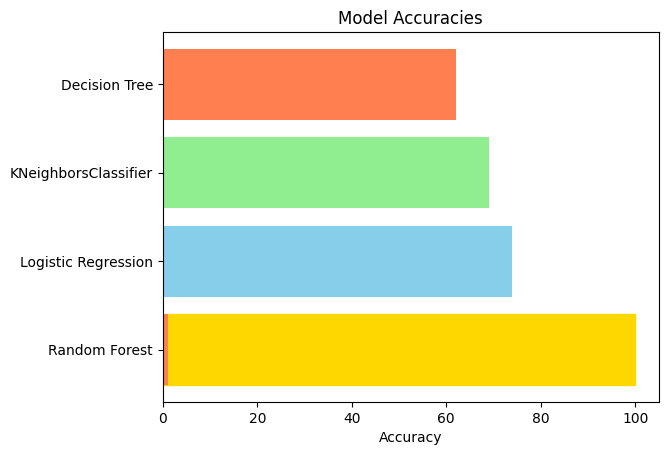

In [56]:
best_model_index = np.argmax(accuracies)
best_model = model_names[best_model_index]
best_accuracy = accuracies[best_model_index]

# Create a figure and axis object
fig, ax = plt.subplots()

# Plotting the bar chart with horizontal bars
bars = ax.barh(model_names, accuracies, color=['skyblue', 'lightgreen', 'coral'])

# Highlight the best model with a different color
bars[best_model_index].set_color('gold')

# Add labels and title
ax.set_xlabel('Accuracy')
ax.set_title('Model Accuracies')

# Display the plot
plt.show()